In [2]:
import networkx as nx
import obonet
import torch
import pandas as pd

/tmp/ipykernel_3951797/2362945497.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
GO_graph = obonet.read_obo("GNN/go-basic.obo")

go_edges = []
for u, v, data in GO_graph.edges(data=True):
    go_edges.append([u, v])
go_edges_df = pd.DataFrame(go_edges, columns=['Source', 'Target']).dropna()
print(go_edges_df)
col_name = ['GO']
for i in range(1,769):
  col_name.append('feature'+str(i))
go_features_df = pd.read_csv("GNN/go_terms_embeddings.csv", skiprows=1, names=col_name).dropna()
#remove solubility

with open('GNN/soluble_go_terms.txt', 'r') as file:
    soluble_go_terms = file.read().splitlines()

# 删除‘GO’列里名字在soluble_go_terms.txt中的行
#go_features_df = go_features_df[~go_features_df['GO'].isin(soluble_go_terms)]

# 用soluble_go_terms列表过滤go_features_df中的行
#mask = go_features_df['GO'].isin(soluble_go_terms)

# 除了'GO'列外，将所有列的值设置为0
#go_features_df.loc[mask, go_features_df.columns != 'GO'] = 0
# 选择除了'GO'列之外的所有列，并将其值设置为0
#go_features_df.loc[:, go_features_df.columns != 'GO'] = 0

# 保存结果到新的CSV文件（可选）
go_features_df.to_csv("GNN/remove_solubility_go_terms_embeddings.csv", index=False)
print(go_features_df)

           Source      Target
0      GO:0000001  GO:0048308
1      GO:0000001  GO:0048311
2      GO:0000002  GO:0007005
3      GO:0000003  GO:0008150
4      GO:0000006  GO:0005385
...           ...         ...
83792  GO:2001317  GO:0034309
83793  GO:2001317  GO:0042181
83794  GO:2001317  GO:0120255
83795  GO:2001317  GO:1901362
83796  GO:2001317  GO:2001316

[83797 rows x 2 columns]
               GO  feature1  feature2  feature3  feature4  feature5  feature6  \
0      GO:0000001 -1.168093 -0.355214  0.265877 -0.710051  0.515028 -0.525165   
1      GO:0000002 -1.185879 -0.098765  0.388240 -0.295556  0.327296 -0.119842   
2      GO:0000003  0.063323 -0.199995  0.151511 -0.942141  0.109313  0.015316   
3      GO:0000005  0.163135  0.301527  0.219680  0.094342 -0.129769  0.225696   
4      GO:0000006 -0.641113 -0.541363  0.413941  0.699345  0.461507 -0.497388   
...           ...       ...       ...       ...       ...       ...       ...   
47590  GO:2001313  0.174428  0.194728 -0.284376

In [4]:
col_name = ['protein']
for i in range(1,769):
  col_name.append('feature'+str(i))
gene_features_df = pd.read_csv('GNN/gene_embedding_GeneLLM_2.csv', header=None, names=col_name).dropna()
#gene_features_df.loc[:, gene_features_df.columns != 'protein'] = 0
print(gene_features_df)

col_name = ['Target', 'Source']
go_protein_df = pd.read_csv(
    "GNN/mart_export.txt", 
    skiprows=1, 
    names=col_name, 
    usecols=[1, 2]  # 使用列的索引来指定
).dropna()
print(go_protein_df)

      protein  feature1  feature2  feature3  feature4  feature5  feature6  \
0         FES  0.339602 -0.030744 -0.901381  0.100888  0.886443  0.383596   
1      HADHA  -0.131799 -0.025745 -0.677301 -0.053545  0.971046  0.180315   
2      SLC7A7  0.385693 -0.070692 -0.847796 -0.022054  0.959772  0.085487   
3        LCK   0.650428  0.014479 -0.866163  0.053508  0.951529  0.269402   
4       HSPA2  0.322262  0.017484 -0.849302  0.046401  0.920429  0.463832   
...       ...       ...       ...       ...       ...       ...       ...   
14445   BPY2C -0.840158 -0.042814 -0.853394 -0.049438  0.943925  0.104337   
14446    CLPS -0.270716 -0.036871 -0.915350 -0.013635  0.972046  0.016017   
14447    DNER  0.228932 -0.033579 -0.907262  0.010446  0.961684  0.524211   
14448    SOX7  0.140491  0.033339 -0.806014 -0.072016  0.938781  0.339959   
14449  CXCL14 -0.570266 -0.011502 -0.741149 -0.096209  0.967244  0.426519   

       feature7  feature8  feature9  ...  feature759  feature760  feature76

In [4]:
print(len(go_features_df))
go_features_df.rename(columns={'GO': 'protein'}, inplace=True)
combined_features = pd.concat([gene_features_df, go_features_df])
combined_features

47595


,protein,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,feature768
0,FES,0.339602,-0.030744,-0.901381,0.100888,0.886443,0.383596,-0.192082,-0.032063,-0.154869,...,-0.549204,-0.856123,0.714672,-0.046649,-0.894424,-0.001815,0.739485,0.015581,-0.023863,-0.022002
1,HADHA,-0.131799,-0.025745,-0.677301,-0.053545,0.971046,0.180315,-0.028189,-0.077389,-0.095152,...,0.927885,-0.817812,0.809631,-0.005827,-0.848839,0.024516,0.526404,-0.039926,-0.102787,-0.026980
2,SLC7A7,0.385693,-0.070692,-0.847796,-0.022054,0.959772,0.085487,0.076455,-0.003006,-0.032268,...,0.941094,-0.912443,0.789828,0.046979,-0.715636,0.085842,0.150494,0.025392,-0.066035,-0.028283
3,LCK,0.650428,0.014479,-0.866163,0.053508,0.951529,0.269402,-0.214788,0.045179,-0.506429,...,-0.576739,-0.969558,0.916549,-0.080332,-0.927649,-0.047398,0.741663,-0.000096,-0.096318,-0.056501
4,HSPA2,0.322262,0.017484,-0.849302,0.046401,0.920429,0.463832,-0.050414,-0.033398,0.387791,...,0.387301,-0.860696,0.678607,-0.060695,-0.945793,0.040472,0.831079,-0.001711,-0.079842,-0.011189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47590,GO:2001313,0.174428,0.194728,-0.284376,0.282102,-0.713190,-0.272055,0.121190,0.129901,-0.983496,...,0.500545,0.429651,-0.292929,-0.464941,-0.740187,0.179149,-0.960807,-0.746958,1.069112,-0.848182
47591,GO:2001314,0.025886,0.306214,-0.254303,0.253673,-0.533680,-0.269355,0.150939,-0.229323,-1.078991,...,0.042979,0.134560,-0.356661,-0.381828,-0.638338,0.077176,-0.788312,-0.683442,1.087031,-0.593092
47592,GO:2001315,0.027134,0.241391,-0.227353,0.317366,-0.726657,-0.197968,0.045653,0.038912,-0.954113,...,0.349853,0.370059,-0.144606,-0.493184,-0.655063,0.217335,-0.841272,-0.821077,1.036363,-0.836614
47593,GO:2001316,0.139543,0.028883,0.899480,0.152932,0.576852,0.330342,0.916943,0.012306,-0.020316,...,-0.354748,-0.083168,0.043640,-0.663565,0.543016,-0.652230,-1.427882,-0.985257,1.673561,0.109659


In [5]:
gene_edges_df = pd.read_csv('GNN/protein_interactions.csv', usecols=[0, 1], names=col_name).dropna()

In [6]:
gene_edges_df

,Target,Source
0,protein1,protein2
1,ARF5,RALGPS2
2,ARF5,FHDC1
3,ARF5,ATP6V1E1
4,ARF5,CYTH2
...,...,...
13715124,LDB1,SAMD14
13715125,LDB1,KDM6B
13715126,LDB1,WWP2
13715127,LDB1,VPS33B


In [7]:
combined_edges = pd.concat([go_protein_df, go_edges_df, gene_edges_df])
#combined_edges = combined_edges[['Source', 'Target']]
combined_edges

,Target,Source
0,MT-TF,GO:0030533
1,MT-TF,GO:0006412
4,MT-RNR2,GO:0003735
5,MT-RNR2,GO:0005840
6,MT-TL1,GO:0030533
...,...,...
13715124,LDB1,SAMD14
13715125,LDB1,KDM6B
13715126,LDB1,WWP2
13715127,LDB1,VPS33B


In [8]:
nodes_in_features = set(combined_features['protein'])

filtered_edges_df = combined_edges[
    combined_edges['Source'].isin(nodes_in_features) & combined_edges['Target'].isin(nodes_in_features)
]


In [9]:
filtered_edges_df

,Target,Source
48,MT-CO1,GO:0016020
49,MT-CO1,GO:0004129
50,MT-CO1,GO:0020037
51,MT-CO1,GO:0009060
52,MT-CO1,GO:0045277
...,...,...
13715122,LDB1,PGAP6
13715125,LDB1,KDM6B
13715126,LDB1,WWP2
13715127,LDB1,VPS33B


In [10]:
node_id_to_index = {node_id: i for i, node_id in enumerate(combined_features['protein'])}
# 确保edge_index是按照这个新的索引顺序排列的
source_indices = [node_id_to_index[node_id] for node_id in filtered_edges_df['Source']]
target_indices = [node_id_to_index[node_id] for node_id in filtered_edges_df['Target']]
edge_index = torch.tensor([source_indices, target_indices], dtype=torch.long)
edge_index

tensor([[24323, 17460, 27132,  ...,   947,  6874, 13222],
        [ 2077,  2077,  2077,  ..., 10107, 10107, 10107]])

In [11]:
#regression
labels_df = pd.read_csv('GNN/phastcons.csv')#
#labels_df.rename(columns={'Gene name': 'protein'}, inplace=True)
labels_df.rename(columns={'GeneSymbol': 'protein'}, inplace=True)
labels_df.rename(columns={'Conservation': 'Label'}, inplace=True)
labels_df

,protein,Label
0,A1BG,0.062761
1,NAT2,0.118469
2,ADA,0.253069
3,CDH2,0.694620
4,GAGE12F,0.088746
...,...,...
30992,SLC12A6,0.659845
30993,PTBP3,0.729372
30994,KCNE2,0.160752
30995,DGCR2,0.627946


In [13]:
#localization
labels_df = pd.read_csv('GNN/subcellular_location.csv')
labels_df.dropna(inplace=True)
location_mapping = {
    'Cell membrane': 0,
    'Nucleus': 1,
    'Cytoplasm': 2
}
labels_df.rename(columns={'GeneSymbol': 'protein'}, inplace=True)
labels_df['Label'] = labels_df['Subcellular_location'].map(location_mapping)
labels_df

,protein,Subcellular_location,Label
0,OR7A10,Cell membrane,0
1,ORC5,Nucleus,1
2,ZNF596,Nucleus,1
3,SFI1,Cytoplasm,2
4,SUCNR1,Cell membrane,0
...,...,...,...
8592,INSR,Cell membrane,0
8593,SLC7A1,Cell membrane,0
8594,SLC44A2,Cell membrane,0
8595,PARM1,Cell membrane,0


In [12]:
labels_df = pd.read_csv('GNN/new_labels.csv')#
#labels_df.rename(columns={'Gene name': 'protein'}, inplace=True)
labels_df.rename(columns={'GeneSymbol': 'protein'}, inplace=True)
#labels_df.rename(columns={'Conservation': 'Label'}, inplace=True)
labels_df

,Unnamed: 0,protein,Solubility,Label,Word_Count,Count_Category
0,0,ERAP2,Membrane,0,117,0
1,1,ADAMTSL5,Soluble,1,28,1
2,2,TBC1D30,Membrane,0,55,0
3,3,KCNK18,Membrane,0,184,0
4,4,NDNF,Soluble,1,129,0
...,...,...,...,...,...,...
1374,1374,TRABD2B,Membrane,0,96,0
1375,1375,RPS9,Soluble,1,205,0
1376,1376,SLC22A16,Membrane,0,93,0
1377,1377,FBN3,Soluble,1,90,0


In [14]:
labels_df = labels_df[
    labels_df['protein'].isin(nodes_in_features)]
labels_df = labels_df.reset_index(drop=True)

label_indices = [node_id_to_index[node_id] for node_id in labels_df['protein']]
print(label_indices)
num_nodes = len(combined_features)
labels = torch.full((num_nodes,), -1, dtype=torch.long)
#labels = torch.full((num_nodes,), -1.0)
for i, index in enumerate(labels_df['Label']):
    labels[label_indices[i]] = index

labels_tensor = torch.tensor(labels)

[3392, 10432, 1559, 6014, 10283, 5428, 11077, 11045, 2705, 7346, 10444, 11680, 7739, 2174, 14092, 3834, 5029, 11211, 191, 2205, 5373, 14094, 11419, 1029, 9446, 8540, 2201, 9682, 5757, 4924, 1416, 1026, 4229, 11718, 8334, 7270, 965, 8936, 10708, 6729, 7873, 2757, 13311, 5238, 8190, 12285, 5863, 13831, 7462, 637, 4275, 9411, 181, 3228, 6842, 3374, 5143, 9340, 13098, 9714, 10022, 8470, 11157, 4626, 8026, 11597, 13583, 10757, 936, 4658, 11589, 2218, 8305, 255, 800, 5781, 10896, 2673, 12293, 6306, 8302, 7223, 4151, 5355, 4941, 6855, 7774, 10328, 7404, 11192, 8771, 1649, 10456, 7825, 8275, 6682, 6335, 8177, 3213, 1822, 534, 13881, 1211, 5187, 2379, 7554, 14125, 11969, 12711, 6294, 180, 441, 10195, 9326, 11374, 7671, 12388, 3585, 2736, 9453, 11331, 8802, 3201, 7385, 5843, 536, 9200, 2793, 13933, 12571, 4645, 10436, 729, 1021, 7979, 4561, 6730, 14374, 7230, 4845, 33, 8770, 9162, 5665, 7794, 12653, 12267, 615, 10181, 12714, 5965, 7472, 6691, 12985, 6349, 1069, 6061, 4880, 4895, 12981, 14301, 11

/tmp/ipykernel_1191971/1731568721.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_tensor = torch.tensor(labels)


In [15]:
features = combined_features.iloc[:, 1:].values
features_tensor = torch.tensor(features, dtype=torch.float)
features

array([[ 0.33960226, -0.03074448, -0.90138096, ...,  0.01558092,
        -0.02386307, -0.02200161],
       [-0.13179901, -0.02574519, -0.67730105, ..., -0.03992649,
        -0.10278717, -0.02697964],
       [ 0.38569278, -0.07069244, -0.8477959 , ...,  0.0253919 ,
        -0.06603534, -0.02828273],
       ...,
       [ 0.02713387,  0.24139147, -0.22735251, ..., -0.82107705,
         1.036363  , -0.83661443],
       [ 0.13954346,  0.02888298,  0.89947975, ..., -0.9852566 ,
         1.6735605 ,  0.10965873],
       [ 0.08306409,  0.09089889,  0.8885408 , ..., -0.79955566,
         1.5193683 ,  0.2632099 ]])

In [16]:
from torch_geometric.data import Data
data = Data(x=features_tensor, edge_index=edge_index, y=labels_tensor)

print("x:", data.x.shape, data.x.dtype)
print("edge_index:", data.edge_index.shape, data.edge_index.dtype)
print("labels:", data.y.shape, data.y.dtype)

x: torch.Size([62045, 768]) torch.float32
edge_index: torch.Size([2, 9914754]) torch.int64
labels: torch.Size([62045]) torch.int64


In [17]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GAT(nn.Module):
    def __init__(self, num_layers, in_dim, num_hidden, num_classes, heads, activation, dropout, negative_slope, residual):
        super(GAT, self).__init__()
        self.num_layers = num_layers
        self.dropout = dropout
        self.gat_layers = nn.ModuleList()
        self.activation = activation

        # Input projection (no residual)
        self.gat_layers.append(GATConv(
            in_dim, num_hidden, heads=heads[0],
            dropout=dropout, negative_slope=negative_slope, concat=True, add_self_loops=True))

        # Hidden layers
        for l in range(1, num_layers):
            # Due to multi-head, the in_dim = num_hidden * num_heads
            self.gat_layers.append(GATConv(
                num_hidden * heads[l-1], num_hidden, heads=heads[l],
                dropout=dropout, negative_slope=negative_slope, concat=True, add_self_loops=True))

        # Output projection
        self.gat_layers.append(GATConv(
            num_hidden * heads[-2], num_classes, heads=heads[-1],
            dropout=dropout, negative_slope=negative_slope, concat=False, add_self_loops=True))

    def forward(self, x, edge_index):
        h = x
        for l, layer in enumerate(self.gat_layers[:-1]):
            h = layer(h, edge_index)
            if self.activation:
                h = self.activation(h)
            if l < self.num_layers - 1:
                h = F.dropout(h, p=self.dropout, training=self.training)

        # Output projection
        logits = self.gat_layers[-1](h, edge_index)
        return logits

In [18]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch.nn import Linear, ModuleList, Dropout

class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes, num_layers, activation, dropout):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.convs = ModuleList([GCNConv(hidden_dim, hidden_dim) for _ in range(num_layers - 2)])
        self.conv_last = GCNConv(hidden_dim, num_classes)
        self.activation = activation
        self.dropout = Dropout(dropout)
        self.num_layers = num_layers

    def forward(self, x, edge_index):
        # 输入层
        x = self.conv1(x, edge_index)
        x = self.activation(x)
        x = self.dropout(x)
        
        # 隐藏层
        for conv in self.convs:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = self.dropout(x)

        # 输出层
        x = self.conv_last(x, edge_index)
        return x
"""
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch.nn import Linear, ModuleList, Dropout

class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes, num_layers, activation, dropout):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.convs = ModuleList([GCNConv(hidden_dim, hidden_dim) for _ in range(num_layers - 2)])
        self.conv_last = GCNConv(hidden_dim, num_classes)
        self.activation = activation
        self.dropout = Dropout(dropout)
        self.num_layers = num_layers
        self.fc = torch.nn.Linear(hidden_dim, num_classes)
    
    def forward(self, x, edge_index):
        # 输入层
        x = self.conv1(x, edge_index)
        x = self.activation(x)
        x = self.dropout(x)
        
        # 隐藏层
        for conv in self.convs:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = self.dropout(x)

        # 输出层
        #x = self.conv_last(x, edge_index)
        x = self.fc(x)
        return x
    def get_embedding(self, x, edge_index):
        # 输入层
        x = self.conv1(x, edge_index)
        x = self.activation(x)
        x = self.dropout(x)
        
        # 隐藏层
        for conv in self.convs:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = self.dropout(x)
        return x

import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
from torch.nn import ModuleList, Dropout, Linear

class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes, num_layers,activation, dropout):
        super(GCN, self).__init__()
        # 为每种节点类型初始化一个全连接层
        self.fc_list = nn.ModuleList([nn.Linear(feats_dim, hidden_dim) for feats_dim in num_features])
        
        # 图卷积层
        self.conv1 = GCNConv(hidden_dim, hidden_dim)
        self.convs = ModuleList([GCNConv(hidden_dim, hidden_dim) for _ in range(num_layers - 2)])
        self.fc = nn.Linear(hidden_dim, num_classes)
        
        self.activation = activation
        self.dropout = Dropout(dropout)
        
        self.conv_last = GCNConv(hidden_dim, num_classes)

    def forward(self, x_list, edge_index):
        # 节点类型特定的特征转换
        x = torch.cat([fc(x) for fc, x in zip(self.fc_list, x_list)], dim=0)
        # 图卷积层
        x = self.conv1(x, edge_index)
        x = self.activation(x)
        x = self.dropout(x)
        
        for conv in self.convs:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = self.dropout(x)

        x = self.fc(x)  # 最终分类层
        return x"""


'\nimport torch.nn.functional as F\nfrom torch_geometric.nn import GCNConv\nfrom torch.nn import Linear, ModuleList, Dropout\n\nclass GCN(torch.nn.Module):\n    def __init__(self, num_features, hidden_dim, num_classes, num_layers, activation, dropout):\n        super(GCN, self).__init__()\n        self.conv1 = GCNConv(num_features, hidden_dim)\n        self.convs = ModuleList([GCNConv(hidden_dim, hidden_dim) for _ in range(num_layers - 2)])\n        self.conv_last = GCNConv(hidden_dim, num_classes)\n        self.activation = activation\n        self.dropout = Dropout(dropout)\n        self.num_layers = num_layers\n        self.fc = torch.nn.Linear(hidden_dim, num_classes)\n    \n    def forward(self, x, edge_index):\n        # 输入层\n        x = self.conv1(x, edge_index)\n        x = self.activation(x)\n        x = self.dropout(x)\n        \n        # 隐藏层\n        for conv in self.convs:\n            x = conv(x, edge_index)\n            x = self.activation(x)\n            x = self.dropou

In [19]:
from __future__ import division

import torch


def accuracy(pred, target):
    r"""Computes the accuracy of correct predictions.

    Args:
        pred (Tensor): The predictions.
        target (Tensor): The targets.

    :rtype: int
    """
    return (pred == target).sum().item() / target.numel()



def true_positive(pred, target, num_classes):
    r"""Computes the number of true positive predictions.

    Args:
        pred (Tensor): The predictions.
        target (Tensor): The targets.
        num_classes (int): The number of classes.

    :rtype: :class:`LongTensor`
    """
    out = []
    for i in range(num_classes):
        out.append(((pred == i) & (target == i)).sum())

    return torch.tensor(out)



def true_negative(pred, target, num_classes):
    r"""Computes the number of true negative predictions.

    Args:
        pred (Tensor): The predictions.
        target (Tensor): The targets.
        num_classes (int): The number of classes.

    :rtype: :class:`LongTensor`
    """
    out = []
    for i in range(num_classes):
        out.append(((pred != i) & (target != i)).sum())

    return torch.tensor(out)



def false_positive(pred, target, num_classes):
    r"""Computes the number of false positive predictions.

    Args:
        pred (Tensor): The predictions.
        target (Tensor): The targets.
        num_classes (int): The number of classes.

    :rtype: :class:`LongTensor`
    """
    out = []
    for i in range(num_classes):
        out.append(((pred == i) & (target != i)).sum())

    return torch.tensor(out)



def false_negative(pred, target, num_classes):
    r"""Computes the number of false negative predictions.

    Args:
        pred (Tensor): The predictions.
        target (Tensor): The targets.
        num_classes (int): The number of classes.

    :rtype: :class:`LongTensor`
    """
    out = []
    for i in range(num_classes):
        out.append(((pred != i) & (target == i)).sum())

    return torch.tensor(out)



def precision(pred, target, num_classes):
    r"""Computes the precision:
    :math:`\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}`.

    Args:
        pred (Tensor): The predictions.
        target (Tensor): The targets.
        num_classes (int): The number of classes.

    :rtype: :class:`Tensor`
    """
    tp = true_positive(pred, target, num_classes).to(torch.float)
    fp = false_positive(pred, target, num_classes).to(torch.float)

    out = tp / (tp + fp)
    out[torch.isnan(out)] = 0

    return out



def recall(pred, target, num_classes):
    r"""Computes the recall:
    :math:`\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}`.

    Args:
        pred (Tensor): The predictions.
        target (Tensor): The targets.
        num_classes (int): The number of classes.

    :rtype: :class:`Tensor`
    """
    tp = true_positive(pred, target, num_classes).to(torch.float)
    fn = false_negative(pred, target, num_classes).to(torch.float)

    out = tp / (tp + fn)
    out[torch.isnan(out)] = 0

    return out



def f1_score(pred, target, num_classes):
    r"""Computes the :math:`F_1` score:
    :math:`2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}
    {\mathrm{precision}+\mathrm{recall}}`.

    Args:
        pred (Tensor): The predictions.
        target (Tensor): The targets.
        num_classes (int): The number of classes.

    :rtype: :class:`Tensor`
    """
    prec = precision(pred, target, num_classes)
    rec = recall(pred, target, num_classes)

    score = 2 * (prec * rec) / (prec + rec)
    score[torch.isnan(score)] = 0

    return score

In [20]:
from sklearn.preprocessing import label_binarize
def train_model_scheduler(model, masked_features, labels, edge_index, optimizer, criterion, scheduler, train_mask):
    model.train()  # 设置模型为训练模
    optimizer.zero_grad()  # 清空梯度
    out = model(masked_features, edge_index)  # 获取模型输出
    loss = criterion(out[train_mask], data.y[train_mask])  # 计算损失值，只针对训练集的节点
    loss.backward()  # 反向传播
    optimizer.step()  # 更新模型参数
    scheduler.step(loss)
    return loss.item()

def train_model(model, masked_features, labels, edge_index, optimizer, criterion, train_mask):
    model.train()  # 设置模型为训练模式
    optimizer.zero_grad()  # 清空梯度
    out = model(masked_features, edge_index) # 获取模型输出
    loss = criterion(out[train_mask], data.y[train_mask])  # 计算损失值，只针对训练集的节点
    loss.backward()  # 反向传播
    optimizer.step()  # 更新模型参数
    return loss.item()

def evaluate_model(model, features, labels, edge_index, mask):
    model.eval()  # 设置模型为评估模式
    with torch.no_grad():  # 关闭梯度计算
        # 获取模型输出，这里假设输出已经是经过sigmoid的概率
        probabilities = model(features, edge_index)
        if probabilities.shape[1] == 2:  # 假设有两个输出（每个类一个概率）
            positive_probs = probabilities[mask, 1]  # 选择正类概率
        else:
            positive_probs = probabilities[mask]  # 如果只有一个输出，假设已经是正类概率
        val_f1 = torch.mean(f1_score(torch.argmax(probabilities[mask],dim=1), labels[mask], num_classes=3)).cpu().numpy()
        auc_score = roc_auc_score(labels[mask].cpu().numpy(), positive_probs.cpu().numpy())

    return val_f1, auc_score
def evaluate_regression(model, features, labels, edge_index, mask):
    model.eval()  # 设置模型为评估模式
    with torch.no_grad():  # 关闭梯度计算
        predictions = model(features, edge_index).squeeze()  # 获取模型输出
        print(predictions[mask])
        mse = torch.mean((predictions[mask] - labels[mask]) ** 2)  # 计算均方误差
        mae = torch.mean(torch.abs(predictions[mask] - labels[mask]))  # 计算平均绝对误差
        rmse = torch.sqrt(mse)  # 计算均方根误差
    return mse.item(), mae.item(), rmse.item()


In [20]:
combined_features

,protein,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,feature768
0,FES,0.339602,-0.030744,-0.901381,0.100888,0.886443,0.383596,-0.192082,-0.032063,-0.154869,...,-0.549204,-0.856123,0.714672,-0.046649,-0.894424,-0.001815,0.739485,0.015581,-0.023863,-0.022002
1,HADHA,-0.131799,-0.025745,-0.677301,-0.053545,0.971046,0.180315,-0.028189,-0.077389,-0.095152,...,0.927885,-0.817812,0.809631,-0.005827,-0.848839,0.024516,0.526404,-0.039926,-0.102787,-0.026980
2,SLC7A7,0.385693,-0.070692,-0.847796,-0.022054,0.959772,0.085487,0.076455,-0.003006,-0.032268,...,0.941094,-0.912443,0.789828,0.046979,-0.715636,0.085842,0.150494,0.025392,-0.066035,-0.028283
3,LCK,0.650428,0.014479,-0.866163,0.053508,0.951529,0.269402,-0.214788,0.045179,-0.506429,...,-0.576739,-0.969558,0.916549,-0.080332,-0.927649,-0.047398,0.741663,-0.000096,-0.096318,-0.056501
4,HSPA2,0.322262,0.017484,-0.849302,0.046401,0.920429,0.463832,-0.050414,-0.033398,0.387791,...,0.387301,-0.860696,0.678607,-0.060695,-0.945793,0.040472,0.831079,-0.001711,-0.079842,-0.011189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47590,GO:2001313,0.174428,0.194728,-0.284376,0.282102,-0.713190,-0.272055,0.121190,0.129901,-0.983496,...,0.500545,0.429651,-0.292929,-0.464941,-0.740187,0.179149,-0.960807,-0.746958,1.069112,-0.848182
47591,GO:2001314,0.025886,0.306214,-0.254303,0.253673,-0.533680,-0.269355,0.150939,-0.229323,-1.078991,...,0.042979,0.134560,-0.356661,-0.381828,-0.638338,0.077176,-0.788312,-0.683442,1.087031,-0.593092
47592,GO:2001315,0.027134,0.241391,-0.227353,0.317366,-0.726657,-0.197968,0.045653,0.038912,-0.954113,...,0.349853,0.370059,-0.144606,-0.493184,-0.655063,0.217335,-0.841272,-0.821077,1.036363,-0.836614
47593,GO:2001316,0.139543,0.028883,0.899480,0.152932,0.576852,0.330342,0.916943,0.012306,-0.020316,...,-0.354748,-0.083168,0.043640,-0.663565,0.543016,-0.652230,-1.427882,-0.985257,1.673561,0.109659


In [21]:
combined_features.iloc[14450]

protein       GO:0000001
feature1       -1.168093
feature2       -0.355214
feature3        0.265877
feature4       -0.710051
                 ...    
feature764     -0.506993
feature765       0.38976
feature766      0.207266
feature767      0.070705
feature768      0.938593
Name: 0, Length: 769, dtype: object

In [22]:
#regression
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = self.conv2(x, edge_index)
        return x


from sklearn.metrics import roc_auc_score
import numpy as np
import random
from sklearn.model_selection import train_test_split
# 实例化模型
device = torch.device('cuda:1')
data = data.to(device)
#model = GCN(num_features=[768,768], hidden_dim=64, num_classes=2, num_layers=3, activation=F.relu, dropout=0.5)
#model = GCN(num_features=data.x.shape[1], hidden_dim=64, num_classes=2, num_layers=2, activation=F.relu, dropout=0.5)
# 假设是一个单变量回归问题
model = GCN(num_features=data.x.shape[1], hidden_dim=64, output_dim=1)

model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
loss_fn = torch.nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=50, verbose=True)

labeled_indices = label_indices
random.shuffle(labeled_indices)
num_labeled = len(labeled_indices)
num_train = int(num_labeled * 0.8)
num_test = num_labeled - num_train
print(num_test)

# 创建训练和测试掩码
train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)

train_mask[labeled_indices[:num_train]] = True
test_mask[labeled_indices[num_train:num_train+num_test]] = True
print(test_mask)

276
tensor([False, False, False,  ..., False, False, False])


In [21]:
from sklearn.metrics import roc_auc_score
import numpy as np
import random
from sklearn.model_selection import train_test_split
# 实例化模型
device = torch.device('cuda:1')
data = data.to(device)
#model = GCN(num_features=[768,768], hidden_dim=64, num_classes=2, num_layers=3, activation=F.relu, dropout=0.5)
model = GCN(num_features=data.x.shape[1], hidden_dim=64, num_classes=3, num_layers=2, activation=F.relu, dropout=0.5)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=50, verbose=True)

labeled_indices = label_indices
random.shuffle(labeled_indices)
num_labeled = len(labeled_indices)
num_train = int(num_labeled * 0.8)
num_test = num_labeled - num_train
print(num_test)

# 创建训练和测试掩码
train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)

train_mask[labeled_indices[:num_train]] = True
test_mask[labeled_indices[num_train:num_train+num_test]] = True
print(test_mask)

1541
tensor([False, False, False,  ..., False, False, False])


In [22]:
#fully connection
num_epochs = 1000
x_type1 = data.x[:14450]
x_type2 = data.x[14450:]
x_list = [x_type1, x_type2]
for epoch in range(num_epochs):
    train_loss = train_model_scheduler(model, x_list, data.y, data.edge_index, optimizer, loss_fn, scheduler, train_mask)
    test_f1, test_auc = evaluate_model(model, x_list, data.y, data.edge_index, test_mask)
    
    if (epoch + 1) % 20 == 0: 
        print(f'Epoch {epoch}: Train Loss:{train_loss:.4f}, Macro_F1: {test_f1:.4f}, AUC_score: {test_auc:.4f}')

ValueError: 'GCNConv' received a tuple of node features as input while this layer does not support bipartite message passing. Please try other layers such as 'SAGEConv' or 'GraphConv' instead

In [33]:
#linear
num_epochs = 1000
for epoch in range(num_epochs):
    train_loss = train_model_scheduler(model, data.x, data.y, data.edge_index, optimizer, loss_fn, scheduler, train_mask)
    test_f1, test_auc = evaluate_model(model, data.x, data.y, data.edge_index, test_mask)
    
    if (epoch + 1) % 20 == 0: 
        print(f'Epoch {epoch}: Train Loss:{train_loss:.4f}, Macro_F1: {test_f1:.4f}, AUC_score: {test_auc:.4f}')

Epoch 19: Train Loss:0.4135, Macro_F1: 0.8323, AUC_score: 0.8807
Epoch 39: Train Loss:0.3151, Macro_F1: 0.8652, AUC_score: 0.9145
Epoch 59: Train Loss:0.2829, Macro_F1: 0.8910, AUC_score: 0.9336
Epoch 79: Train Loss:0.2524, Macro_F1: 0.8982, AUC_score: 0.9435
Epoch 99: Train Loss:0.2432, Macro_F1: 0.9053, AUC_score: 0.9468
Epoch 119: Train Loss:0.2050, Macro_F1: 0.9015, AUC_score: 0.9495
Epoch 139: Train Loss:0.1900, Macro_F1: 0.9274, AUC_score: 0.9528
Epoch 159: Train Loss:0.1855, Macro_F1: 0.9273, AUC_score: 0.9532
Epoch 179: Train Loss:0.1761, Macro_F1: 0.9202, AUC_score: 0.9540
Epoch 199: Train Loss:0.1732, Macro_F1: 0.9273, AUC_score: 0.9547
Epoch 219: Train Loss:0.1510, Macro_F1: 0.9163, AUC_score: 0.9533
Epoch 239: Train Loss:0.1416, Macro_F1: 0.9163, AUC_score: 0.9531
Epoch 259: Train Loss:0.1537, Macro_F1: 0.9163, AUC_score: 0.9549
Epoch 279: Train Loss:0.1351, Macro_F1: 0.9199, AUC_score: 0.9555
Epoch 299: Train Loss:0.1530, Macro_F1: 0.9237, AUC_score: 0.9577
Epoch 319: Trai

In [20]:
print(num_train)
print(train_mask)

1103
tensor([False, False, False,  ..., False, False, False])


In [53]:
num_epochs = 1000
for epoch in range(num_epochs):
    train_loss = train_model_scheduler(model, data.x, data.y, data.edge_index, optimizer, loss_fn, scheduler, train_mask)
    test_f1, test_auc = evaluate_model(model, data.x, data.y, data.edge_index, test_mask)
    
    if (epoch + 1) % 20 == 0: 
        print(f'Epoch {epoch}: Train Loss:{train_loss:.4f}, Macro_F1: {test_f1:.4f}, AUC_score: {test_auc:.4f}')

/home/yue/.conda/envs/python310/lib/python3.10/site-packages/sklearn/utils/_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [54]:
print("Input Features NaN Check:", torch.isnan(data.x).any().item())
print("Input Features Inf Check:", torch.isinf(data.x).any().item())
print("Edge Index NaN Check:", torch.isnan(data.edge_index).any().item())
print("Edge Index Inf Check:", torch.isinf(data.edge_index).any().item())


Input Features NaN Check: False
Input Features Inf Check: False
Edge Index NaN Check: False
Edge Index Inf Check: False


In [55]:
#regresion
num_epochs = 1000
for epoch in range(num_epochs):
    train_loss = train_model_scheduler(model, data.x, data.y, data.edge_index, optimizer, loss_fn, scheduler, train_mask)
    mse, mae, rmse = evaluate_regression(model, data.x, data.y, data.edge_index, test_mask)
    
    if (epoch + 1) % 20 == 0: 
        print(f'Epoch {epoch}: Train Loss:{train_loss:.4f}, mse: {mse:.4f}, mae: {mae:.4f}, rmse: {rmse:.4f}')

/home/yue/.conda/envs/python310/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([10853])) that is different to the input size (torch.Size([10853, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([nan, nan, nan,  ..., nan, nan, nan], device='cuda:1')
tensor([

In [21]:
torch.save(model.state_dict(), 'GGwith_linear.pth')

In [19]:
num_layers=1
n_heads = 6
heads = ([n_heads] * num_layers) + [1]
heads

[6, 1]

In [24]:
from sklearn.metrics import roc_auc_score
import numpy as np
device = torch.device('cuda:1')
data = data.to(device)
num_layers=1
heads = ([n_heads] * num_layers) + [1]

model = GAT(num_layers=num_layers, 
            in_dim=features.shape[1], 
            num_hidden=64, 
            num_classes=2, 
            heads = heads, 
            activation=F.elu, dropout=0.6, negative_slope=0.2, residual=True).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.001)#0.0005
loss_fn = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=50, verbose=True)

label_indices = torch.tensor(label_indices, dtype=torch.long)
print(label_indices)
# 随机打乱有标签的节点索引
labeled_indices = label_indices[torch.randperm(label_indices.size(0))]
#print(labeled_indices)
labeled_indices = label_indices

# 定义训练和测试集的大小
num_labeled = labeled_indices.size(0)
num_train = int(num_labeled * 0.8)
num_test = num_labeled - num_train
print(num_test)

# 创建训练和测试掩码
train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)

train_mask[labeled_indices[:num_train]] = True
test_mask[labeled_indices[num_train:num_train+num_test]] = True
print(test_mask)
num_epochs = 1000
for epoch in range(num_epochs):
    train_loss = train_model_scheduler(model, data.x, data.y, data.edge_index, optimizer, loss_fn, scheduler, train_mask)
    #train_loss = train_model(model, data.x, data.y, data.edge_index, optimizer, loss_fn, train_mask)
    test_acc, test_auc = evaluate_model(model, data.x, data.y, data.edge_index, test_mask)
    
    if epoch % 10 == 0: 
        print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Macro_F1: {test_acc:.4f}, AUC_score: {test_auc:.4f}')

/tmp/ipykernel_4052808/384139741.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_indices = torch.tensor(label_indices, dtype=torch.long)


tensor([   67,    81,    93,  ..., 14398, 14407, 14426])
276
tensor([False, False, False,  ..., False, False, False])
Epoch 0: Train Loss: 0.6935, Macro_F1: 0.3897, AUC_score: 0.7263
Epoch 10: Train Loss: 0.6867, Macro_F1: 0.2977, AUC_score: 0.7515
Epoch 20: Train Loss: 0.6775, Macro_F1: 0.3710, AUC_score: 0.7702
Epoch 30: Train Loss: 0.6668, Macro_F1: 0.4810, AUC_score: 0.7854
Epoch 40: Train Loss: 0.6377, Macro_F1: 0.6844, AUC_score: 0.7661
Epoch 50: Train Loss: 0.5642, Macro_F1: 0.6831, AUC_score: 0.7506
Epoch 60: Train Loss: 0.4668, Macro_F1: 0.8629, AUC_score: 0.8021
Epoch 70: Train Loss: 0.4418, Macro_F1: 0.9191, AUC_score: 0.8227
Epoch 80: Train Loss: 0.3400, Macro_F1: 0.9376, AUC_score: 0.8663
Epoch 90: Train Loss: 0.3410, Macro_F1: 0.9630, AUC_score: 0.8997
Epoch 100: Train Loss: 0.3227, Macro_F1: 0.9594, AUC_score: 0.9387
Epoch 110: Train Loss: 0.2961, Macro_F1: 0.9666, AUC_score: 0.8963
Epoch 120: Train Loss: 0.3108, Macro_F1: 0.9666, AUC_score: 0.9101
Epoch 130: Train Loss:

In [23]:
torch.save(model.state_dict(), 'GGwith_GAT.pth')

In [22]:
class GAT(nn.Module):
    def __init__(self, num_layers, in_dim, num_hidden, num_classes, heads, activation, dropout, negative_slope, residual):
        super(GAT, self).__init__()
        self.num_layers = num_layers
        self.dropout = dropout
        self.gat_layers = nn.ModuleList()
        self.activation = activation

        # Input projection (no residual)
        self.gat_layers.append(GATConv(
            in_dim, num_hidden, heads=heads[0],
            dropout=dropout, negative_slope=negative_slope, concat=True, add_self_loops=True))

        # Hidden layers
        for l in range(1, num_layers):
            # Due to multi-head, the in_dim = num_hidden * num_heads
            self.gat_layers.append(GATConv(
                num_hidden * heads[l-1], num_hidden, heads=heads[l],
                dropout=dropout, negative_slope=negative_slope, concat=True, add_self_loops=True))

        # Output projection
        self.gat_layers.append(GATConv(
            num_hidden * heads[-2], num_classes, heads=heads[-1],
            dropout=dropout, negative_slope=negative_slope, concat=False, add_self_loops=True))

    def forward(self, x, edge_index):
        h = x
        for l, layer in enumerate(self.gat_layers[:-1]):
            h = layer(h, edge_index)
            if self.activation:
                h = self.activation(h)
            if l < self.num_layers - 1:
                h = F.dropout(h, p=self.dropout, training=self.training)

        # Output projection
        logits = self.gat_layers[-1](h, edge_index)
        return logits
    def get_embeddings(self, x, edge_index):
        h = x
        for l, layer in enumerate(self.gat_layers[:-1]):
            h = layer(h, edge_index)
            if self.activation:
                h = self.activation(h)
            if l GGwith_GAT.pth< self.num_layers - 1:
                h = F.dropout(h, p=self.dropout, training=self.training)
        
        return h

import torch
import torch.nn as nn
from torch_geometric.nn import GCNConv
from torch.nn import ModuleList, Dropout, Linear

class GCN(torch.nn.Module):
    def __init__(self, in_feats, hidden_dim, num_classes, num_layers, num_node_types, activation, dropout):
        super(GCN, self).__init__()
        # 为每种节点类型初始化一个全连接层
        self.fc_list = nn.ModuleList([nn.Linear(feats_dim, hidden_dim) for feats_dim in in_feats])
        
        # 图卷积层
        self.conv1 = GCNConv(hidden_dim, hidden_dim)
        self.convs = ModuleList([GCNConv(hidden_dim, hidden_dim) for _ in range(num_layers - 2)])
        self.fc = nn.Linear(hidden_dim, num_classes)
        
        self.activation = activation
        self.dropout = Dropout(dropout)
        
        # 权重初始化（可选）
        for fc in self.fc_list:
            nn.init.xavier_normal_(fc.weight, gain=1.414)
        for layer in self.convs:
            nn.init.xavier_normal_(layer.weight, gain=1.4)

    def forward(self, x, edge_index, node_types):
        # 节点类型特定的特征转换
        h = [fc(x_i) for fc, x_i in zip(self.fc_list, x)]
        x = torch.cat(h, 0)  # 将不同类型的节点特征合并
        
        # 图卷积层
        x = self.conv1(x, edge_index)
        x = self.activation(x)
        x = self.dropout(x)
        
        for conv in self.convs:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = self.dropout(x)

        x = self.fc(x)  # 最终分类层
        return x

    def get_embedding(self, x, edge_index, node_types):
        # 重复前向传播中的处理，但通常不包括最后的分类层
        h = [fc(x_i) for fc, x_i in zip(self.fc_list, x)]
        x = torch.cat(h, 0)
        
        x = self.conv1(x, edge_index)
        x = self.activation(x)
        x = self.dropout(x)
        
        for conv in self.convs:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = self.dropout(x)
        
        return x


In [31]:

#model = GCN(num_features=data.x.shape[1], hidden_dim=64, num_classes=2, num_layers=2, activation=F.relu, dropout=0.5).to(device)
#model.load_state_dict(torch.load('GGwith.pth'))
model.eval()  # 切换模型到评估模式

with torch.no_grad():  # 在评估模式下不需要计算梯度
    embeddings = model.get_embedding(data.x, data.edge_index).to('cpu')

# 将嵌入转换为 DataFrame
embeddings_df = pd.DataFrame(embeddings.numpy(), columns=[f'Feature_{i}' for i in range(embeddings.shape[1])])

# 打印嵌入结果 DataFrame
print(embeddings_df)

       Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0       0.146868        0.0   0.027175   0.107902   0.161667   0.000000   
1       0.000000        0.0   0.310793   0.095509   0.278071   0.000000   
2       0.000000        0.0   0.000000   0.751667   0.000000   0.000000   
3       0.000000        0.0   0.349353   0.073857   0.288762   0.000000   
4       0.000000        0.0   0.538568   0.000000   0.581786   0.001704   
...          ...        ...        ...        ...        ...        ...   
62040   0.122980        0.0   0.000000   0.883799   0.000000   0.000000   
62041   0.080433        0.0   0.000000   0.404349   0.000750   0.000206   
62042   0.021762        0.0   0.000000   0.702997   0.000000   0.000000   
62043   0.509305        0.0   0.785769   0.000000   0.666547   0.003337   
62044   1.305182        0.0   0.866692   0.000000   0.683970   0.000000   

       Feature_6  Feature_7  Feature_8  Feature_9  ...  Feature_54  \
0       0.214584   0.065325  

In [32]:
combined_features

,protein,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,feature768
0,FES,0.339602,-0.030744,-0.901381,0.100888,0.886443,0.383596,-0.192082,-0.032063,-0.154869,...,-0.549204,-0.856123,0.714672,-0.046649,-0.894424,-0.001815,0.739485,0.015581,-0.023863,-0.022002
1,HADHA,-0.131799,-0.025745,-0.677301,-0.053545,0.971046,0.180315,-0.028189,-0.077389,-0.095152,...,0.927885,-0.817812,0.809631,-0.005827,-0.848839,0.024516,0.526404,-0.039926,-0.102787,-0.026980
2,SLC7A7,0.385693,-0.070692,-0.847796,-0.022054,0.959772,0.085487,0.076455,-0.003006,-0.032268,...,0.941094,-0.912443,0.789828,0.046979,-0.715636,0.085842,0.150494,0.025392,-0.066035,-0.028283
3,LCK,0.650428,0.014479,-0.866163,0.053508,0.951529,0.269402,-0.214788,0.045179,-0.506429,...,-0.576739,-0.969558,0.916549,-0.080332,-0.927649,-0.047398,0.741663,-0.000096,-0.096318,-0.056501
4,HSPA2,0.322262,0.017484,-0.849302,0.046401,0.920429,0.463832,-0.050414,-0.033398,0.387791,...,0.387301,-0.860696,0.678607,-0.060695,-0.945793,0.040472,0.831079,-0.001711,-0.079842,-0.011189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47590,GO:2001313,0.174428,0.194728,-0.284376,0.282102,-0.713190,-0.272055,0.121190,0.129901,-0.983496,...,0.500545,0.429651,-0.292929,-0.464941,-0.740187,0.179149,-0.960807,-0.746958,1.069112,-0.848182
47591,GO:2001314,0.025886,0.306214,-0.254303,0.253673,-0.533680,-0.269355,0.150939,-0.229323,-1.078991,...,0.042979,0.134560,-0.356661,-0.381828,-0.638338,0.077176,-0.788312,-0.683442,1.087031,-0.593092
47592,GO:2001315,0.027134,0.241391,-0.227353,0.317366,-0.726657,-0.197968,0.045653,0.038912,-0.954113,...,0.349853,0.370059,-0.144606,-0.493184,-0.655063,0.217335,-0.841272,-0.821077,1.036363,-0.836614
47593,GO:2001316,0.139543,0.028883,0.899480,0.152932,0.576852,0.330342,0.916943,0.012306,-0.020316,...,-0.354748,-0.083168,0.043640,-0.663565,0.543016,-0.652230,-1.427882,-0.985257,1.673561,0.109659


In [46]:

last_key = list(node_id_to_index.keys())[-1]
last_value = node_id_to_index[last_key]

print(f"Last key: {last_key}, Last value: {last_value}")

Last key: GO:2001317, Last value: 62044


In [49]:
combined_features = combined_features.reset_index(drop=True)
embeddings_df.insert(0, 'name', combined_features['protein'])


ValueError: cannot insert name, already exists

In [33]:
embeddings_df.to_csv('embeddings_with_GGlinear.csv', index=False)

In [37]:
features = data.x  # 示例特征
edge_index = data.edge_index  # 示例边缘索引
labels = data.y  # 示例标签
# 评估模型
val_f1, auc_score = evaluate_model(model, features, labels, edge_index, test_mask)
print(f'Validation F1 Score: {val_f1:.4f}')
print(f'ROC AUC Score: {auc_score:.4f}')

Validation F1 Score: 0.9670
ROC AUC Score: 0.9931


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np
device = torch.device('cuda')
data = data.to(device)

model = GAT(num_layers=1, 
            in_dim=features.shape[1], 
            num_hidden=64, 
            num_classes=2, 
            heads = heads, 
            activation=F.elu, dropout=0.6, negative_slope=0.2, residual=True).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.001)#0.0005
loss_fn = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=100, verbose=True)

label_indices = torch.tensor(label_indices, dtype=torch.long)
print(label_indices)
# 随机打乱有标签的节点索引
labeled_indices = label_indices[torch.randperm(label_indices.size(0))]
#print(labeled_indices)
labeled_indices = label_indices

# 定义训练和测试集的大小
num_labeled = labeled_indices.size(0)
num_train = int(num_labeled * 0.8)
num_test = num_labeled - num_train
print(num_test)

# 创建训练和测试掩码
train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)

train_mask[labeled_indices[:num_train]] = True
test_mask[labeled_indices[num_train:num_train+num_test]] = True
print(test_mask)
num_epochs = 500
for epoch in range(num_epochs):
    train_loss = train_model_scheduler(model, data.x, data.y, data.edge_index, optimizer, loss_fn, scheduler, train_mask)
    #train_loss = train_model(model, data.x, data.y, data.edge_index, optimizer, loss_fn, train_mask)
    test_acc, test_auc = evaluate_model(model, data.x, data.y, data.edge_index, test_mask)
    
    if (epoch + 1) % 10 == 0: 
        print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Macro_F1: {test_acc:.4f}, AUC_score: {test_auc:.4f}')

/tmp/ipykernel_1338021/1920998772.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label_indices = torch.tensor(label_indices, dtype=torch.long)


tensor([ 1019,  8632, 10776,  ...,  7349,  1137,  4545])
276
tensor([False, False, False,  ..., False, False, False])
Epoch 9: Train Loss: 0.6529, Macro_F1: 0.8006, AUC_score: 0.3963
Epoch 19: Train Loss: 0.5299, Macro_F1: 0.7897, AUC_score: 0.1746
Epoch 29: Train Loss: 0.4589, Macro_F1: 0.8202, AUC_score: 0.0999
Epoch 39: Train Loss: 0.4406, Macro_F1: 0.8985, AUC_score: 0.0841
Epoch 49: Train Loss: 0.5106, Macro_F1: 0.9130, AUC_score: 0.0822
Epoch 59: Train Loss: 0.4014, Macro_F1: 0.9238, AUC_score: 0.0830
Epoch 69: Train Loss: 0.3948, Macro_F1: 0.9165, AUC_score: 0.0837
Epoch 79: Train Loss: 0.3624, Macro_F1: 0.9239, AUC_score: 0.0807
Epoch 89: Train Loss: 0.3454, Macro_F1: 0.9130, AUC_score: 0.0833
Epoch 99: Train Loss: 0.3451, Macro_F1: 0.9092, AUC_score: 0.0970
Epoch 109: Train Loss: 0.3832, Macro_F1: 0.9203, AUC_score: 0.0929
Epoch 119: Train Loss: 0.3633, Macro_F1: 0.9130, AUC_score: 0.0854
Epoch 129: Train Loss: 0.3709, Macro_F1: 0.9201, AUC_score: 0.1003
Epoch 139: Train Loss:

In [34]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch.nn import Linear, ModuleList, Dropout

class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_dim, num_classes, num_layers, activation, dropout):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_dim)
        self.convs = ModuleList([GCNConv(hidden_dim, hidden_dim) for _ in range(num_layers - 2)])
        self.conv_last = GCNConv(hidden_dim, num_classes)
        self.activation = activation
        self.dropout = Dropout(dropout)
        self.num_layers = num_layers

    def forward(self, x, edge_index):
        # 输入层
        x = self.conv1(x, edge_index)
        x = self.activation(x)
        x = self.dropout(x)
        
        # 隐藏层
        for conv in self.convs:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = self.dropout(x)

        # 输出层
        x = self.conv_last(x, edge_index)
        return x
    def get_embeddings(self, x, edge_index):
        # 输入层
        x = self.conv1(x, edge_index)
        x = self.activation(x)
        x = self.dropout(x)
        
        # 隐藏层
        for conv in self.convs:
            x = conv(x, edge_index)
            x = self.activation(x)
            x = self.dropout(x)

        # 返回最后一层之前的嵌入
        return x

In [54]:
num_rows = len(embeddings_df)
if num_rows > 47595:
    filtered_df = embeddings_df.iloc[:num_rows - 47595]
else:
    filtered_df = embeddings_df.copy()  # 如果行数不够，复制整个 DataFrame

# 打印过滤后的 DataFrame
print(filtered_df)

         name  Feature_0  Feature_1  Feature_2  Feature_3  Feature_4  \
0         FES        0.0        0.0        0.0        0.0        0.0   
1      HADHA         0.0        0.0        0.0        0.0        0.0   
2      SLC7A7        0.0        0.0        0.0        0.0        0.0   
3        LCK         0.0        0.0        0.0        0.0        0.0   
4       HSPA2        0.0        0.0        0.0        0.0        0.0   
...       ...        ...        ...        ...        ...        ...   
14445   BPY2C        0.0        0.0        0.0        0.0        0.0   
14446    CLPS        0.0        0.0        0.0        0.0        0.0   
14447    DNER        0.0        0.0        0.0        0.0        0.0   
14448    SOX7        0.0        0.0        0.0        0.0        0.0   
14449  CXCL14        0.0        0.0        0.0        0.0        0.0   

       Feature_5  Feature_6  Feature_7  Feature_8  ...  Feature_54  \
0            0.0   0.000000   0.000000   0.000000  ...    0.00000

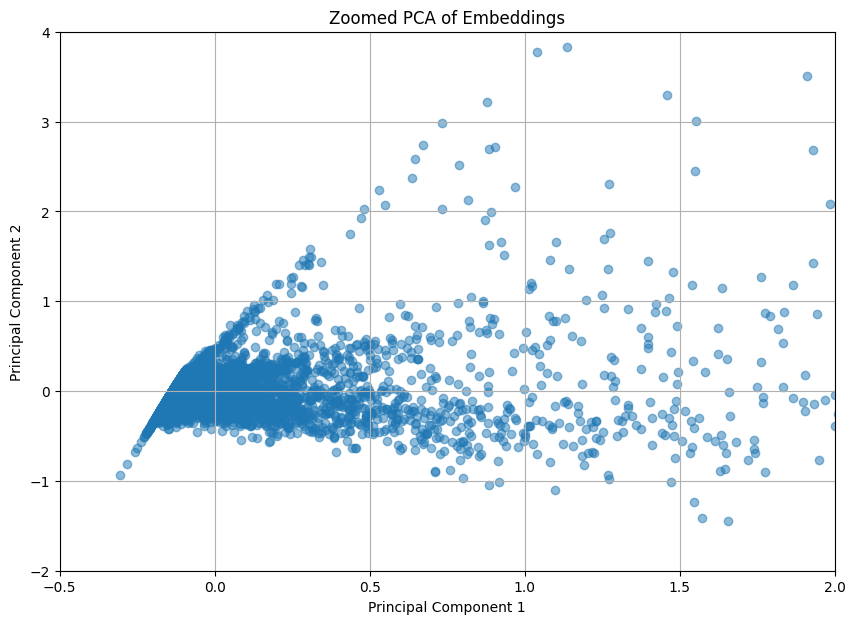

In [65]:
import pandas as pd
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 提取嵌入向量
X = filtered_df.drop(columns=['name'])

# 进行 PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# 创建 PCA 结果的 DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['name'] = filtered_df['name']
"""
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
for i, txt in enumerate(pca_df['name']):
    plt.annotate(txt, (pca_df['Principal Component 1'][i], pca_df['Principal Component 2'][i]), fontsize=8, alpha=0.7)
plt.title('PCA of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()"""

# 选择放大区域的范围
x_min, x_max = -0.5, 2  # 根据初始图确定的范围
y_min, y_max = -2, 4 # 根据初始图确定的范围

# 绘制放大后的 PCA 图
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], alpha=0.5)
#for i, txt in enumerate(pca_df['name']):
#    plt.annotate(txt, (pca_df['Principal Component 1'][i], pca_df['Principal Component 2'][i]), fontsize=8, alpha=0.7)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title('Zoomed PCA of Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [68]:
labels_df.rename(columns={'protein':'name'}, inplace=True)
label_df = labels_df[['name', 'Label']]
merged_df = pd.merge(filtered_df, label_df, on='name', how='inner')
merged_df

,name,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_55,Feature_56,Feature_57,Feature_58,Feature_59,Feature_60,Feature_61,Feature_62,Feature_63,Label
0,ERAP2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0
1,ADAMTSL5,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,1
2,TBC1D30,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0
3,KCNK18,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0
4,NDNF,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,TRABD2B,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.052822,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0
1375,RPS9,0.0,0.0,0.534929,1.434695,0.804825,0.0,3.487443,1.025692,3.750202,...,0.000000,0.0,0.0,0.518183,2.788001,0.0,1.35715,0.0,3.186884,1
1376,SLC22A16,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.117923,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0
1377,FBN3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.059236,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,1


In [77]:
X = merged_df.drop(columns=['name', 'Label'])
y = merged_df['Label']

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score

# 标准化 embeddings
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 降维（可选）
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 训练逻辑回归模型
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# 进行预测
y_pred_logistic = logistic_model.predict(X_test)
y_pred_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# 计算逻辑回归的准确率和AUC
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
auc_logistic = roc_auc_score(y_test, y_pred_prob_logistic)
print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print(f'Logistic Regression AUC: {auc_logistic}')

# 训练线性回归模型
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 进行预测
y_pred_prob_linear = linear_model.predict(X_test)

# 将预测的连续值转换为二分类结果
y_pred_linear = (y_pred_prob_linear >= 0.5).astype(int)

# 计算线性回归的准确率和AUC
accuracy_linear = accuracy_score(y_test, y_pred_linear)
auc_linear = roc_auc_score(y_test, y_pred_prob_linear)
print(f'Linear Regression Accuracy: {accuracy_linear}')
print(f'Linear Regression AUC: {auc_linear}')

Logistic Regression Accuracy: 0.6086956521739131
Logistic Regression AUC: 0.7230257601351351
Linear Regression Accuracy: 0.5036231884057971
Linear Regression AUC: 0.7171135979729729


In [82]:
model = GCN(num_features=data.x.shape[1], hidden_dim=64, num_classes=2, num_layers=2, activation=F.relu, dropout=0.5).to(device)
model.load_state_dict(torch.load('GGwith.pth'))
model.eval()  # 切换模型到评估模式

with torch.no_grad():  # 在评估模式下不需要计算梯度
    logits = model(data.x, data.edge_index)
    probabilities = torch.sigmoid(logits)
    predicted_labels = (probabilities >= 0.5).int()

predicted_labels_1d = torch.argmax(predicted_labels, dim=1)

# 打印结果
print(predicted_labels_1d)

tensor([1, 1, 0,  ..., 0, 0, 0])


In [90]:
probabilities = F.softmax(logits, dim=1)[:, 1].numpy()
probabilities

array([8.5382396e-01, 6.5293795e-01, 1.0555269e-04, ..., 3.9361306e-03,
       3.0122927e-01, 5.2143085e-09], dtype=float32)

In [91]:
results_df = pd.DataFrame({
    'protein': combined_features['protein'],
    'predicted_label': probabilities
})

In [92]:
results_df

,protein,predicted_label
0,FES,8.538240e-01
1,HADHA,6.529379e-01
2,SLC7A7,1.055527e-04
3,LCK,7.084623e-01
4,HSPA2,9.923551e-01
...,...,...
62040,GO:2001313,2.497066e-04
62041,GO:2001314,2.186424e-02
62042,GO:2001315,3.936131e-03
62043,GO:2001316,3.012293e-01


In [93]:
labels_df.rename(columns={'name':'protein'}, inplace=True)
label_df = labels_df[['protein', 'Label']]
merged_df = pd.merge(results_df, label_df, on='protein', how='inner')
merged_df

,protein,predicted_label,Label
0,ERAP2,0.381655,0
1,ADAMTSL5,0.996719,1
2,TBC1D30,0.488628,0
3,KCNK18,0.000004,0
4,NDNF,0.999265,1
...,...,...,...
1374,TRABD2B,0.000329,0
1375,RPS9,1.000000,1
1376,SLC22A16,0.000376,0
1377,FBN3,0.965023,1


In [95]:
auc = roc_auc_score(merged_df['Label'], merged_df['predicted_label'])
print(f'AUC: {auc}')

AUC: 0.9969159842536262


In [ ]:
#hidding

In [22]:
labeled_indices = label_indices
labeled_indices

[5183,
 11072,
 6534,
 13349,
 7020,
 12799,
 9405,
 8993,
 13287,
 5417,
 5828,
 5797,
 9036,
 7974,
 3909,
 10223,
 8391,
 3933,
 6545,
 3523,
 13643,
 2750,
 6434,
 4091,
 10829,
 11222,
 10266,
 1541,
 10879,
 2481,
 1905,
 1350,
 587,
 4382,
 4903,
 10782,
 4712,
 13719,
 13346,
 9138,
 7296,
 10003,
 1810,
 6113,
 13151,
 11853,
 2241,
 4211,
 5149,
 11081,
 6877,
 8719,
 762,
 4540,
 6653,
 6460,
 539,
 2325,
 5330,
 13878,
 10310,
 9151,
 10636,
 11328,
 3161,
 8871,
 2732,
 8627,
 293,
 3920,
 11402,
 10303,
 6672,
 10505,
 4045,
 12097,
 13713,
 3335,
 12493,
 8889,
 5750,
 13801,
 6781,
 2205,
 6001,
 2852,
 10486,
 9475,
 13067,
 5465,
 8614,
 8687,
 646,
 11899,
 5076,
 8824,
 2039,
 2762,
 10193,
 5098,
 3945,
 2538,
 5811,
 1589,
 14413,
 4259,
 11161,
 10287,
 6446,
 10302,
 9490,
 7459,
 5271,
 4007,
 6751,
 3930,
 8429,
 9443,
 9194,
 4056,
 10107,
 12559,
 941,
 14242,
 5119,
 5983,
 2867,
 2894,
 2204,
 13859,
 9789,
 13012,
 5214,
 12985,
 1856,
 13559,
 12210,
 11

In [23]:
import numpy as np
train_indices = labeled_indices[:num_train]
test_indices = labeled_indices[num_train:num_train+num_test]
print(train_indices)
print(test_indices)

[5183, 11072, 6534, 13349, 7020, 12799, 9405, 8993, 13287, 5417, 5828, 5797, 9036, 7974, 3909, 10223, 8391, 3933, 6545, 3523, 13643, 2750, 6434, 4091, 10829, 11222, 10266, 1541, 10879, 2481, 1905, 1350, 587, 4382, 4903, 10782, 4712, 13719, 13346, 9138, 7296, 10003, 1810, 6113, 13151, 11853, 2241, 4211, 5149, 11081, 6877, 8719, 762, 4540, 6653, 6460, 539, 2325, 5330, 13878, 10310, 9151, 10636, 11328, 3161, 8871, 2732, 8627, 293, 3920, 11402, 10303, 6672, 10505, 4045, 12097, 13713, 3335, 12493, 8889, 5750, 13801, 6781, 2205, 6001, 2852, 10486, 9475, 13067, 5465, 8614, 8687, 646, 11899, 5076, 8824, 2039, 2762, 10193, 5098, 3945, 2538, 5811, 1589, 14413, 4259, 11161, 10287, 6446, 10302, 9490, 7459, 5271, 4007, 6751, 3930, 8429, 9443, 9194, 4056, 10107, 12559, 941, 14242, 5119, 5983, 2867, 2894, 2204, 13859, 9789, 13012, 5214, 12985, 1856, 13559, 12210, 11700, 12467, 8294, 287, 9178, 12332, 8592, 7717, 11115, 2737, 9197, 704, 7054, 11497, 6244, 4267, 2588, 5745, 380, 5710, 3587, 2996, 4519,

In [24]:
combined_features

,protein,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature759,feature760,feature761,feature762,feature763,feature764,feature765,feature766,feature767,feature768
0,FES,0.339602,-0.030744,-0.901381,0.100888,0.886443,0.383596,-0.192082,-0.032063,-0.154869,...,-0.549204,-0.856123,0.714672,-0.046649,-0.894424,-0.001815,0.739485,0.015581,-0.023863,-0.022002
1,HADHA,-0.131799,-0.025745,-0.677301,-0.053545,0.971046,0.180315,-0.028189,-0.077389,-0.095152,...,0.927885,-0.817812,0.809631,-0.005827,-0.848839,0.024516,0.526404,-0.039926,-0.102787,-0.026980
2,SLC7A7,0.385693,-0.070692,-0.847796,-0.022054,0.959772,0.085487,0.076455,-0.003006,-0.032268,...,0.941094,-0.912443,0.789828,0.046979,-0.715636,0.085842,0.150494,0.025392,-0.066035,-0.028283
3,LCK,0.650428,0.014479,-0.866163,0.053508,0.951529,0.269402,-0.214788,0.045179,-0.506429,...,-0.576739,-0.969558,0.916549,-0.080332,-0.927649,-0.047398,0.741663,-0.000096,-0.096318,-0.056501
4,HSPA2,0.322262,0.017484,-0.849302,0.046401,0.920429,0.463832,-0.050414,-0.033398,0.387791,...,0.387301,-0.860696,0.678607,-0.060695,-0.945793,0.040472,0.831079,-0.001711,-0.079842,-0.011189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47590,GO:2001313,0.174428,0.194728,-0.284376,0.282102,-0.713190,-0.272055,0.121190,0.129901,-0.983496,...,0.500545,0.429651,-0.292929,-0.464941,-0.740187,0.179149,-0.960807,-0.746958,1.069112,-0.848182
47591,GO:2001314,0.025886,0.306214,-0.254303,0.253673,-0.533680,-0.269355,0.150939,-0.229323,-1.078991,...,0.042979,0.134560,-0.356661,-0.381828,-0.638338,0.077176,-0.788312,-0.683442,1.087031,-0.593092
47592,GO:2001315,0.027134,0.241391,-0.227353,0.317366,-0.726657,-0.197968,0.045653,0.038912,-0.954113,...,0.349853,0.370059,-0.144606,-0.493184,-0.655063,0.217335,-0.841272,-0.821077,1.036363,-0.836614
47593,GO:2001316,0.139543,0.028883,0.899480,0.152932,0.576852,0.330342,0.916943,0.012306,-0.020316,...,-0.354748,-0.083168,0.043640,-0.663565,0.543016,-0.652230,-1.427882,-0.985257,1.673561,0.109659


In [25]:
num_iterations = 100
count = 1 / num_iterations

# 总节点数
num_nodes = data.x.shape[0]
# 所有节点的索引
all_indices = np.arange(num_nodes)
mask_out = torch.ones(num_nodes, dtype=torch.bool)
# 将测试集索引处的掩码设为False
#mask_out[test_indices] = False
end = len(combined_features) - 47595
mask_out[-47595:] = False
#mask_out[0:end] = False
# 使用掩码获取剩余的索引
remaining_indices = all_indices[mask_out]
complement_mask = ~mask_out
complement_mask[test_indices] = False

# 得到既不在 remaining_indices 也不在 test_indices 中的索引
complement_indices = all_indices[complement_mask]
print(len(complement_indices))

47595


In [26]:
num_nodes_out = len(complement_indices)
num_to_select = int(num_nodes_out * count)
for i in range(num_iterations+1):
    if i > 0:
    # 随机选择节点
        selected_indices = np.random.choice(complement_indices, num_to_select, replace=False)
        # 更新剩余节点列表
        complement_indices = np.setdiff1d(complement_indices, selected_indices)
    else:
        selected_indices = np.random.choice(complement_indices, 0, replace=False)
        complement_indices = np.setdiff1d(complement_indices, selected_indices)
    print("c:",len(complement_indices))
    # 保存到文件
    print("s:",len(selected_indices))
    np.save(f'DIVIDED_DATA/GOwith_{i}%.npy', complement_indices)  # 修改保存路径

print("所有迭代的selected_indices和remaining_indices已保存到文件。")

c: 47595
s: 0
c: 47120
s: 475
c: 46645
s: 475
c: 46170
s: 475
c: 45695
s: 475
c: 45220
s: 475
c: 44745
s: 475
c: 44270
s: 475
c: 43795
s: 475
c: 43320
s: 475
c: 42845
s: 475
c: 42370
s: 475
c: 41895
s: 475
c: 41420
s: 475
c: 40945
s: 475
c: 40470
s: 475
c: 39995
s: 475
c: 39520
s: 475
c: 39045
s: 475
c: 38570
s: 475
c: 38095
s: 475
c: 37620
s: 475
c: 37145
s: 475
c: 36670
s: 475
c: 36195
s: 475
c: 35720
s: 475
c: 35245
s: 475
c: 34770
s: 475
c: 34295
s: 475
c: 33820
s: 475
c: 33345
s: 475
c: 32870
s: 475
c: 32395
s: 475
c: 31920
s: 475
c: 31445
s: 475
c: 30970
s: 475
c: 30495
s: 475
c: 30020
s: 475
c: 29545
s: 475
c: 29070
s: 475
c: 28595
s: 475
c: 28120
s: 475
c: 27645
s: 475
c: 27170
s: 475
c: 26695
s: 475
c: 26220
s: 475
c: 25745
s: 475
c: 25270
s: 475
c: 24795
s: 475
c: 24320
s: 475
c: 23845
s: 475
c: 23370
s: 475
c: 22895
s: 475
c: 22420
s: 475
c: 21945
s: 475
c: 21470
s: 475
c: 20995
s: 475
c: 20520
s: 475
c: 20045
s: 475
c: 19570
s: 475
c: 19095
s: 475
c: 18620
s: 475
c: 18145
s

In [27]:
class EarlyStopping:
    """早停机制，用于在验证损失停止改善时终止训练。"""
    def __init__(self, patience=200, verbose=False, delta=0):
        """
        参数:
            patience (int): 损失没有改善的迭代次数，在这之后训练将会被停止。
            verbose (bool): 如果为True，则打印一条消息表明早停被触发。
            delta (float): 损失的最小改变，被认为是改善。
            path (str): 最佳模型保存路径。
        """
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.best_loss = None
        self.early_stop = False
        self.counter = 0

    def __call__(self, val_loss, model, path):
        if self.best_loss is None:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model, path)
        elif val_loss > self.best_loss - self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print("Early stopping triggered")
        else:
            self.best_loss = val_loss
            self.save_checkpoint(val_loss, model, path)
            self.counter = 0
    
    def save_checkpoint(self, val_loss, model, path):
        '''保存模型当验证损失减少时'''
        if self.verbose:
            print(f'Validation loss decreased ({self.best_loss:.6f} --> {val_loss:.6f}).')

In [28]:
masked_features = features
masked_features[torch.tensor(complement_indices)] = 0
masked_features

array([[ 0.33960226, -0.03074448, -0.90138096, ...,  0.01558092,
        -0.02386307, -0.02200161],
       [-0.13179901, -0.02574519, -0.67730105, ..., -0.03992649,
        -0.10278717, -0.02697964],
       [ 0.38569278, -0.07069244, -0.8477959 , ...,  0.0253919 ,
        -0.06603534, -0.02828273],
       ...,
       [ 0.02713387,  0.24139147, -0.22735251, ..., -0.82107705,
         1.036363  , -0.83661443],
       [ 0.13954346,  0.02888298,  0.89947975, ..., -0.9852566 ,
         1.6735605 ,  0.10965873],
       [ 0.08306409,  0.09089889,  0.8885408 , ..., -0.79955566,
         1.5193683 ,  0.2632099 ]])

In [29]:
highinfo_indices = [
    node_id_to_index[node_id]
    for node_id, weight in zip(labels_df['protein'], labels_df['Count_Category'])
    if weight == 0
]
print(highinfo_indices)
lowinfo_indices = [
    node_id_to_index[node_id]
    for node_id, weight in zip(labels_df['protein'], labels_df['Count_Category'])
    if weight == 1
]
print(lowinfo_indices)

KeyError: 'Count_Category'

In [ ]:
high_indices = torch.tensor(highinfo_indices, dtype=torch.long)
high_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
high_mask[high_indices] = True
test_high = high_mask & test_mask
low_indices = torch.tensor(lowinfo_indices, dtype=torch.long)
low_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
low_mask[low_indices] = True
test_low = low_mask & test_mask

In [32]:
device = torch.device('cuda:1')
data = data.to(device)
results = []
num_epochs = 1000
# 加载数据
features = data.x
labels = data.y # 根据你的数据加载函数进行调整
num_iterations = 100
original_features = features.clone()
# 总共需要迭代的次数，这里以逐步增加5%为例，直到100%
model = GCN(num_features=data.x.shape[1], hidden_dim=64, num_classes=3, num_layers=3, activation=F.relu, dropout=0.5)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=0.001)
loss_fn = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=50, verbose=True)
for i in range(num_iterations):
    # 加载这次迭代的selected_indices和remaining_indices
    selected_indices = np.load(f'DIVIDED_DATA/GOwith_{i}%.npy')
    
    # 根据selected_indices和remaining_indices调整特征
    masked_features = features.clone()
    masked_features[torch.tensor(selected_indices)] = 0  # 假设features是一个PyTorch tensor
    
    early_stopping = EarlyStopping(patience=200, verbose=True, delta=0.00001)
    
    if i > 0:
        # 从上一个迭代保存的模型中加载参数
        model.load_state_dict(torch.load(f'G-G_DATA/G-G_model_WITH{i-1}.pth'))
        # 重新初始化优化器和调度器
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=100, verbose=True)
    
    # 模型训练和评估逻辑
    for epoch in range(num_epochs):
        train_loss = train_model_scheduler(model, masked_features, data.y, data.edge_index, optimizer, loss_fn, scheduler, train_mask)
        test_f1, test_auc = evaluate_model(model, masked_features, data.y, data.edge_index, test_mask)
        #high_f1, high_auc = evaluate_model(model, data.x, data.y, data.edge_index, test_high)
        #low_f1, low_auc = evaluate_model(model, data.x, data.y, data.edge_index, test_low)
        if epoch % 50 == 0:  # 每10个epoch打印一次信息
            print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Macro_F1: {test_f1:.4f}, AUC_score: {test_auc:.4f}')
        early_stopping(train_loss, model, i)
        if early_stopping.early_stop or epoch == num_epochs - 1:
            results.append({
                            'Train Loss': train_loss,
                            'F1': test_f1,
                            'AUC_score': test_auc
                        })
                            #'highinfo F1': high_f1,                                                            
                            #'highinfo AUC_score': high_auc,
                            #'lowinfo F1': low_f1,
                            #'lowinfo AUC_score': low_auc
            print("acc save")
            rate = 1 - count * (i + 1)
            rate = rate * 100
            print(f'{rate}% node features transform to 0: F1: {test_f1:.4f}, AUC_score: {test_auc:.4f}')
            torch.save(model.state_dict(), f'G-G_DATA/G-G_model_WITH{i}.pth')
            break

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [39]:
results


[{'Train Loss': 0.048501625657081604,
  'F1': array(0.9383856, dtype=float32),
  'AUC_score': 0.9723565272230397,
  'highinfo F1': array(0.9319728, dtype=float32),
  'highinfo AUC_score': 0.9695980542754735,
  'lowinfo F1': array(0.9585327, dtype=float32),
  'lowinfo AUC_score': 0.99375},
 {'Train Loss': 0.014602147974073887,
  'F1': array(0.9383662, dtype=float32),
  'AUC_score': 0.9751944502837924,
  'highinfo F1': array(0.9359836, dtype=float32),
  'highinfo AUC_score': 0.9727342549923194,
  'lowinfo F1': array(0.9585327, dtype=float32),
  'lowinfo AUC_score': 0.99375},
 {'Train Loss': 0.0157631766051054,
  'F1': array(0.9455943, dtype=float32),
  'AUC_score': 0.9753521126760564,
  'highinfo F1': array(0.93596315, dtype=float32),
  'highinfo AUC_score': 0.972990271377368,
  'lowinfo F1': array(0.9585327, dtype=float32),
  'lowinfo AUC_score': 0.99375},
 {'Train Loss': 0.011848380789160728,
  'F1': array(0.9455943, dtype=float32),
  'AUC_score': 0.9747740172377547,
  'highinfo F1': a

In [40]:
import json
import numpy as np
from numpy import array, float32
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.generic):
            return obj.item()
        return super(NumpyEncoder, self).default(obj)


# 保存为 JSON 文件
with open('GNN/zeroed_protein.json', 'w') as f:
    json.dump(results, f, cls=NumpyEncoder, indent=4)

In [7]:
import json
import numpy as np
from numpy import array, float32
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.generic):
            return obj.item()
        return super(NumpyEncoder, self).default(obj)
results = [{'Train Loss': 0.5224899053573608,
  'F1': array(0.75060236, dtype=float32),
  'AUC_score': 0.8627626050420167,
  'highinfo F1': array(0.6002752, dtype=float32),
  'highinfo AUC_score': 0.8030367231638418,
  'lowinfo F1': array(0.73389363, dtype=float32),
  'lowinfo AUC_score': 0.8352272727272727},
 {'Train Loss': 0.4383935034275055,
  'F1': array(0.851213, dtype=float32),
  'AUC_score': 0.8709558823529412,
  'highinfo F1': array(0.6882392, dtype=float32),
  'highinfo AUC_score': 0.8238700564971752,
  'lowinfo F1': array(0.73389363, dtype=float32),
  'lowinfo AUC_score': 0.8380681818181818},
 {'Train Loss': 0.40343186259269714,
  'F1': array(0.85356534, dtype=float32),
  'AUC_score': 0.8606617647058823,
  'highinfo F1': array(0.73701656, dtype=float32),
  'highinfo AUC_score': 0.846680790960452,
  'lowinfo F1': array(0.8683299, dtype=float32),
  'lowinfo AUC_score': 0.8352272727272727},
 {'Train Loss': 0.3463888168334961,
  'F1': array(0.8386737, dtype=float32),
  'AUC_score': 0.8164915966386553,
  'highinfo F1': array(0.79359686, dtype=float32),
  'highinfo AUC_score': 0.8819915254237287,
  'lowinfo F1': array(0.8683299, dtype=float32),
  'lowinfo AUC_score': 0.8636363636363636},
 {'Train Loss': 0.19426140189170837,
  'F1': array(0.8623116, dtype=float32),
  'AUC_score': 0.9043592436974791,
  'highinfo F1': array(0.80534816, dtype=float32),
  'highinfo AUC_score': 0.8737994350282486,
  'lowinfo F1': array(0.78711486, dtype=float32),
  'lowinfo AUC_score': 0.8664772727272727},
 {'Train Loss': 0.12317196279764175,
  'F1': array(0.87305343, dtype=float32),
  'AUC_score': 0.9067752100840335,
  'highinfo F1': array(0.8058452, dtype=float32),
  'highinfo AUC_score': 0.8775423728813558,
  'lowinfo F1': array(0.7548387, dtype=float32),
  'lowinfo AUC_score': 0.8522727272727273},
 {'Train Loss': 0.12100005149841309,
  'F1': array(0.87305343, dtype=float32),
  'AUC_score': 0.9341911764705881,
  'highinfo F1': array(0.85281384, dtype=float32),
  'highinfo AUC_score': 0.8845338983050847,
  'lowinfo F1': array(0.6933236, dtype=float32),
  'lowinfo AUC_score': 0.8693181818181819},
 {'Train Loss': 0.09250399470329285,
  'F1': array(0.8838384, dtype=float32),
  'AUC_score': 0.9196953781512606,
  'highinfo F1': array(0.84440327, dtype=float32),
  'highinfo AUC_score': 0.8834039548022599,
  'lowinfo F1': array(0.809319, dtype=float32),
  'lowinfo AUC_score': 0.8806818181818182},
 {'Train Loss': 0.07261261343955994,
  'F1': array(0.8874314, dtype=float32),
  'AUC_score': 0.9243172268907563,
  'highinfo F1': array(0.8440726, dtype=float32),
  'highinfo AUC_score': 0.8745056497175141,
  'lowinfo F1': array(0.7840909, dtype=float32),
  'lowinfo AUC_score': 0.9204545454545454},
 {'Train Loss': 0.06745654344558716,
  'F1': array(0.87281275, dtype=float32),
  'AUC_score': 0.9169642857142858,
  'highinfo F1': array(0.8440726, dtype=float32),
  'highinfo AUC_score': 0.8765536723163843,
  'lowinfo F1': array(0.809319, dtype=float32),
  'lowinfo AUC_score': 0.9090909090909092},
 {'Train Loss': 0.0410689115524292,
  'F1': array(0.88403356, dtype=float32),
  'AUC_score': 0.9373949579831933,
  'highinfo F1': array(0.84023464, dtype=float32),
  'highinfo AUC_score': 0.8760593220338981,
  'lowinfo F1': array(0.7797102, dtype=float32),
  'lowinfo AUC_score': 0.9034090909090909},
 {'Train Loss': 0.036087535321712494,
  'F1': array(0.87305343, dtype=float32),
  'AUC_score': 0.934453781512605,
  'highinfo F1': array(0.82772803, dtype=float32),
  'highinfo AUC_score': 0.8771186440677966,
  'lowinfo F1': array(0.80484223, dtype=float32),
  'lowinfo AUC_score': 0.8977272727272727},
 {'Train Loss': 0.02374139428138733,
  'F1': array(0.8839605, dtype=float32),
  'AUC_score': 0.9375,
  'highinfo F1': array(0.8191713, dtype=float32),
  'highinfo AUC_score': 0.8713983050847458,
  'lowinfo F1': array(0.77380955, dtype=float32),
  'lowinfo AUC_score': 0.8863636363636364},
 {'Train Loss': 0.017087901011109352,
  'F1': array(0.8912815, dtype=float32),
  'AUC_score': 0.9467962184873949,
  'highinfo F1': array(0.8150084, dtype=float32),
  'highinfo AUC_score': 0.8687853107344633,
  'lowinfo F1': array(0.80484223, dtype=float32),
  'lowinfo AUC_score': 0.8636363636363636},
 {'Train Loss': 0.024169573560357094,
  'F1': array(0.8912815, dtype=float32),
  'AUC_score': 0.9478991596638655,
  'highinfo F1': array(0.81065357, dtype=float32),
  'highinfo AUC_score': 0.8838276836158192,
  'lowinfo F1': array(0.8303571, dtype=float32),
  'lowinfo AUC_score': 0.934659090909091},
 {'Train Loss': 0.015433990396559238,
  'F1': array(0.90211093, dtype=float32),
  'AUC_score': 0.9574579831932772,
  'highinfo F1': array(0.8235294, dtype=float32),
  'highinfo AUC_score': 0.8870056497175142,
  'lowinfo F1': array(0.8303571, dtype=float32),
  'lowinfo AUC_score': 0.9261363636363636},
 {'Train Loss': 0.009460334666073322,
  'F1': array(0.8948599, dtype=float32),
  'AUC_score': 0.9555672268907562,
  'highinfo F1': array(0.81507385, dtype=float32),
  'highinfo AUC_score': 0.8829802259887005,
  'lowinfo F1': array(0.8303571, dtype=float32),
  'lowinfo AUC_score': 0.9204545454545455},
 {'Train Loss': 0.013440035283565521,
  'F1': array(0.8984174, dtype=float32),
  'AUC_score': 0.9652836134453782,
  'highinfo F1': array(0.8193245, dtype=float32),
  'highinfo AUC_score': 0.8994350282485876,
  'lowinfo F1': array(0.8303571, dtype=float32),
  'lowinfo AUC_score': 0.9573863636363636},
 {'Train Loss': 0.015707021579146385,
  'F1': array(0.891253, dtype=float32),
  'AUC_score': 0.9648109243697479,
  'highinfo F1': array(0.82758194, dtype=float32),
  'highinfo AUC_score': 0.9034604519774011,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9517045454545454},
 {'Train Loss': 0.009879552759230137,
  'F1': array(0.891253, dtype=float32),
  'AUC_score': 0.9627100840336135,
  'highinfo F1': array(0.8191713, dtype=float32),
  'highinfo AUC_score': 0.9083333333333332,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9517045454545454},
 {'Train Loss': 0.015236727893352509,
  'F1': array(0.8839605, dtype=float32),
  'AUC_score': 0.9688025210084034,
  'highinfo F1': array(0.8230797, dtype=float32),
  'highinfo AUC_score': 0.9167372881355932,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9460227272727273},
 {'Train Loss': 0.006653571501374245,
  'F1': array(0.8839605, dtype=float32),
  'AUC_score': 0.9716386554621848,
  'highinfo F1': array(0.83174264, dtype=float32),
  'highinfo AUC_score': 0.9231638418079094,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9232954545454546},
 {'Train Loss': 0.008208495564758778,
  'F1': array(0.891253, dtype=float32),
  'AUC_score': 0.9621848739495799,
  'highinfo F1': array(0.8613225, dtype=float32),
  'highinfo AUC_score': 0.9225282485875705,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9318181818181819},
 {'Train Loss': 0.014964545145630836,
  'F1': array(0.89121294, dtype=float32),
  'AUC_score': 0.9676470588235294,
  'highinfo F1': array(0.8655367, dtype=float32),
  'highinfo AUC_score': 0.9269067796610169,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9346590909090909},
 {'Train Loss': 0.00846161600202322,
  'F1': array(0.89129865, dtype=float32),
  'AUC_score': 0.9709558823529412,
  'highinfo F1': array(0.86546075, dtype=float32),
  'highinfo AUC_score': 0.9355225988700565,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9545454545454546},
 {'Train Loss': 0.0107728261500597,
  'F1': array(0.90940964, dtype=float32),
  'AUC_score': 0.9722163865546218,
  'highinfo F1': array(0.8739407, dtype=float32),
  'highinfo AUC_score': 0.9334039548022598,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9375},
 {'Train Loss': 0.00939225871115923,
  'F1': array(0.8985294, dtype=float32),
  'AUC_score': 0.9776785714285715,
  'highinfo F1': array(0.8697456, dtype=float32),
  'highinfo AUC_score': 0.9329802259887006,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9204545454545454},
 {'Train Loss': 0.011036264710128307,
  'F1': array(0.9383662, dtype=float32),
  'AUC_score': 0.9851890756302522,
  'highinfo F1': array(0.8863921, dtype=float32),
  'highinfo AUC_score': 0.9401129943502825,
  'lowinfo F1': array(0.94602275, dtype=float32),
  'lowinfo AUC_score': 0.9886363636363636},
 {'Train Loss': 0.005777299404144287,
  'F1': array(0.9057921, dtype=float32),
  'AUC_score': 0.9804621848739495,
  'highinfo F1': array(0.8865526, dtype=float32),
  'highinfo AUC_score': 0.9319209039548023,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9545454545454546},
 {'Train Loss': 0.01656293496489525,
  'F1': array(0.91303897, dtype=float32),
  'AUC_score': 0.9846113445378152,
  'highinfo F1': array(0.8781491, dtype=float32),
  'highinfo AUC_score': 0.9305790960451977,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9602272727272727},
 {'Train Loss': 0.009177271276712418,
  'F1': array(0.9164814, dtype=float32),
  'AUC_score': 0.9888655462184874,
  'highinfo F1': array(0.8823197, dtype=float32),
  'highinfo AUC_score': 0.9409604519774011,
  'lowinfo F1': array(0.8606016, dtype=float32),
  'lowinfo AUC_score': 0.96875},
 {'Train Loss': 0.005756791681051254,
  'F1': array(0.9092189, dtype=float32),
  'AUC_score': 0.9821953781512606,
  'highinfo F1': array(0.86974555, dtype=float32),
  'highinfo AUC_score': 0.9273305084745763,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.96875},
 {'Train Loss': 0.005266912747174501,
  'F1': array(0.92013884, dtype=float32),
  'AUC_score': 0.9841911764705882,
  'highinfo F1': array(0.8823446, dtype=float32),
  'highinfo AUC_score': 0.9396892655367232,
  'lowinfo F1': array(0.8606016, dtype=float32),
  'lowinfo AUC_score': 0.9857954545454546},
 {'Train Loss': 0.00484166806563735,
  'F1': array(0.916613, dtype=float32),
  'AUC_score': 0.9815126050420168,
  'highinfo F1': array(0.87372667, dtype=float32),
  'highinfo AUC_score': 0.9331920903954802,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9403409090909091},
 {'Train Loss': 0.007429955527186394,
  'F1': array(0.9420259, dtype=float32),
  'AUC_score': 0.979936974789916,
  'highinfo F1': array(0.88205314, dtype=float32),
  'highinfo AUC_score': 0.9442796610169492,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9914772727272727},
 {'Train Loss': 0.006036914419382811,
  'F1': array(0.94198024, dtype=float32),
  'AUC_score': 0.9790966386554623,
  'highinfo F1': array(0.89063275, dtype=float32),
  'highinfo AUC_score': 0.9502824858757062,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9886363636363636},
 {'Train Loss': 0.00476914132013917,
  'F1': array(0.94198024, dtype=float32),
  'AUC_score': 0.9795693277310925,
  'highinfo F1': array(0.8863922, dtype=float32),
  'highinfo AUC_score': 0.946186440677966,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9573863636363636},
 {'Train Loss': 0.00859004259109497,
  'F1': array(0.92747533, dtype=float32),
  'AUC_score': 0.9737394957983194,
  'highinfo F1': array(0.8905631, dtype=float32),
  'highinfo AUC_score': 0.9392655367231637,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9431818181818181},
 {'Train Loss': 0.007178982254117727,
  'F1': array(0.9383662, dtype=float32),
  'AUC_score': 0.9773109243697479,
  'highinfo F1': array(0.8905631, dtype=float32),
  'highinfo AUC_score': 0.9422316384180791,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9460227272727273},
 {'Train Loss': 0.0034060280304402113,
  'F1': array(0.92386407, dtype=float32),
  'AUC_score': 0.9785189075630252,
  'highinfo F1': array(0.88214487, dtype=float32),
  'highinfo AUC_score': 0.9354519774011298,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9318181818181819},
 {'Train Loss': 0.005657465197145939,
  'F1': array(0.9419527, dtype=float32),
  'AUC_score': 0.9758928571428571,
  'highinfo F1': array(0.9032229, dtype=float32),
  'highinfo AUC_score': 0.9351694915254237,
  'lowinfo F1': array(0.916361, dtype=float32),
  'lowinfo AUC_score': 0.9488636363636364},
 {'Train Loss': 0.0033094389364123344,
  'F1': array(0.9383662, dtype=float32),
  'AUC_score': 0.9775210084033613,
  'highinfo F1': array(0.8733773, dtype=float32),
  'highinfo AUC_score': 0.9499293785310734,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9431818181818182},
 {'Train Loss': 0.006701362784951925,
  'F1': array(0.952893, dtype=float32),
  'AUC_score': 0.98125,
  'highinfo F1': array(0.86891246, dtype=float32),
  'highinfo AUC_score': 0.943361581920904,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9460227272727273},
 {'Train Loss': 0.007686189375817776,
  'F1': array(0.9492647, dtype=float32),
  'AUC_score': 0.9794117647058823,
  'highinfo F1': array(0.8775264, dtype=float32),
  'highinfo AUC_score': 0.9475988700564972,
  'lowinfo F1': array(0.856387, dtype=float32),
  'lowinfo AUC_score': 0.9431818181818182},
 {'Train Loss': 0.0054614790715277195,
  'F1': array(0.95284843, dtype=float32),
  'AUC_score': 0.9777836134453781,
  'highinfo F1': array(0.93696475, dtype=float32),
  'highinfo AUC_score': 0.9639830508474576,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9517045454545454},
 {'Train Loss': 0.002809555269777775,
  'F1': array(0.9383662, dtype=float32),
  'AUC_score': 0.9788340336134453,
  'highinfo F1': array(0.9033187, dtype=float32),
  'highinfo AUC_score': 0.9609463276836159,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9488636363636364},
 {'Train Loss': 0.0031079419422894716,
  'F1': array(0.9565195, dtype=float32),
  'AUC_score': 0.9790966386554621,
  'highinfo F1': array(0.8945391, dtype=float32),
  'highinfo AUC_score': 0.9519774011299436,
  'lowinfo F1': array(0.916361, dtype=float32),
  'lowinfo AUC_score': 0.9460227272727273},
 {'Train Loss': 0.0022691311314702034,
  'F1': array(0.9565012, dtype=float32),
  'AUC_score': 0.9787289915966385,
  'highinfo F1': array(0.890377, dtype=float32),
  'highinfo AUC_score': 0.9548022598870056,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9403409090909091},
 {'Train Loss': 0.002626045374199748,
  'F1': array(0.9347278, dtype=float32),
  'AUC_score': 0.9762605042016806,
  'highinfo F1': array(0.9073996, dtype=float32),
  'highinfo AUC_score': 0.9652542372881356,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9602272727272727},
 {'Train Loss': 0.01435729581862688,
  'F1': array(0.9347278, dtype=float32),
  'AUC_score': 0.9902836134453781,
  'highinfo F1': array(0.93276834, dtype=float32),
  'highinfo AUC_score': 0.9764124293785311,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9488636363636364},
 {'Train Loss': 0.002415803261101246,
  'F1': array(0.9347278, dtype=float32),
  'AUC_score': 0.9797268907563026,
  'highinfo F1': array(0.9075042, dtype=float32),
  'highinfo AUC_score': 0.9660310734463275,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9488636363636364},
 {'Train Loss': 0.007185796741396189,
  'F1': array(0.9565126, dtype=float32),
  'AUC_score': 0.9816176470588236,
  'highinfo F1': array(0.9115007, dtype=float32),
  'highinfo AUC_score': 0.9676553672316383,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9715909090909091},
 {'Train Loss': 0.002636982360854745,
  'F1': array(0.9492514, dtype=float32),
  'AUC_score': 0.9800945378151261,
  'highinfo F1': array(0.9074585, dtype=float32),
  'highinfo AUC_score': 0.9699858757062149,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9630681818181819},
 {'Train Loss': 0.006525544915348291,
  'F1': array(0.93104994, dtype=float32),
  'AUC_score': 0.9751050420168067,
  'highinfo F1': array(0.93276834, dtype=float32),
  'highinfo AUC_score': 0.9687146892655368,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9943181818181819},
 {'Train Loss': 0.004266633652150631,
  'F1': array(0.9456172, dtype=float32),
  'AUC_score': 0.9796743697478991,
  'highinfo F1': array(0.9158713, dtype=float32),
  'highinfo AUC_score': 0.9700564971751413,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9715909090909091},
 {'Train Loss': 0.006280777510255575,
  'F1': array(0.9383402, dtype=float32),
  'AUC_score': 0.9738445378151261,
  'highinfo F1': array(0.92434835, dtype=float32),
  'highinfo AUC_score': 0.9697033898305085,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.96875},
 {'Train Loss': 0.006153980270028114,
  'F1': array(0.93469685, dtype=float32),
  'AUC_score': 0.9714810924369748,
  'highinfo F1': array(0.9243644, dtype=float32),
  'highinfo AUC_score': 0.9642655367231638,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9744318181818182},
 {'Train Loss': 0.0018373191123828292,
  'F1': array(0.9347278, dtype=float32),
  'AUC_score': 0.9767857142857143,
  'highinfo F1': array(0.9243644, dtype=float32),
  'highinfo AUC_score': 0.9708333333333332,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9659090909090909},
 {'Train Loss': 0.0019959257915616035,
  'F1': array(0.9347278, dtype=float32),
  'AUC_score': 0.9727415966386554,
  'highinfo F1': array(0.92434835, dtype=float32),
  'highinfo AUC_score': 0.9734463276836158,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9545454545454546},
 {'Train Loss': 0.002284497953951359,
  'F1': array(0.9492514, dtype=float32),
  'AUC_score': 0.971218487394958,
  'highinfo F1': array(0.920099, dtype=float32),
  'highinfo AUC_score': 0.9686440677966102,
  'lowinfo F1': array(0.916361, dtype=float32),
  'lowinfo AUC_score': 0.9971590909090909},
 {'Train Loss': 0.002086743712425232,
  'F1': array(0.9347278, dtype=float32),
  'AUC_score': 0.9723739495798319,
  'highinfo F1': array(0.9243644, dtype=float32),
  'highinfo AUC_score': 0.9646892655367232,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9914772727272727},
 {'Train Loss': 0.003558192867785692,
  'F1': array(0.9383662, dtype=float32),
  'AUC_score': 0.9651260504201681,
  'highinfo F1': array(0.91168827, dtype=float32),
  'highinfo AUC_score': 0.9682203389830508,
  'lowinfo F1': array(0.916361, dtype=float32),
  'lowinfo AUC_score': 0.9971590909090909},
 {'Train Loss': 0.0023635737597942352,
  'F1': array(0.94198024, dtype=float32),
  'AUC_score': 0.9722163865546218,
  'highinfo F1': array(0.92013276, dtype=float32),
  'highinfo AUC_score': 0.971186440677966,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9886363636363636},
 {'Train Loss': 0.002227094955742359,
  'F1': array(0.9456172, dtype=float32),
  'AUC_score': 0.9698529411764706,
  'highinfo F1': array(0.92013276, dtype=float32),
  'highinfo AUC_score': 0.9704096045197741,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9971590909090909},
 {'Train Loss': 0.0035450805444270372,
  'F1': array(0.94198024, dtype=float32),
  'AUC_score': 0.9727941176470588,
  'highinfo F1': array(0.91594267, dtype=float32),
  'highinfo AUC_score': 0.9681497175141244,
  'lowinfo F1': array(0.9182795, dtype=float32),
  'lowinfo AUC_score': 0.9886363636363636},
 {'Train Loss': 0.0019835997372865677,
  'F1': array(0.9492647, dtype=float32),
  'AUC_score': 0.9726890756302521,
  'highinfo F1': array(0.9116384, dtype=float32),
  'highinfo AUC_score': 0.9661723163841809,
  'lowinfo F1': array(0.8869048, dtype=float32),
  'lowinfo AUC_score': 0.9488636363636364},
 {'Train Loss': 0.001824672450311482,
  'F1': array(0.94198024, dtype=float32),
  'AUC_score': 0.9688550420168068,
  'highinfo F1': array(0.920099, dtype=float32),
  'highinfo AUC_score': 0.971045197740113,
  'lowinfo F1': array(0.9449276, dtype=float32),
  'lowinfo AUC_score': 0.9715909090909091},
 {'Train Loss': 0.008919095620512962,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9608718487394957,
  'highinfo F1': array(0.93275416, dtype=float32),
  'highinfo AUC_score': 0.9655367231638418,
  'lowinfo F1': array(0.97275984, dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.004075885750353336,
  'F1': array(0.9492647, dtype=float32),
  'AUC_score': 0.9745273109243697,
  'highinfo F1': array(0.94115984, dtype=float32),
  'highinfo AUC_score': 0.9711864406779661,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0016640423564240336,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9769957983193277,
  'highinfo F1': array(0.9411723, dtype=float32),
  'highinfo AUC_score': 0.9728813559322034,
  'lowinfo F1': array(0.97275984, dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.00264760828576982,
  'F1': array(0.9420016, dtype=float32),
  'AUC_score': 0.9785714285714286,
  'highinfo F1': array(0.94957626, dtype=float32),
  'highinfo AUC_score': 0.973728813559322,
  'lowinfo F1': array(0.97275984, dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0019195948261767626,
  'F1': array(0.9492647, dtype=float32),
  'AUC_score': 0.9751050420168067,
  'highinfo F1': array(0.94115984, dtype=float32),
  'highinfo AUC_score': 0.9714689265536723,
  'lowinfo F1': array(0.97275984, dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0022223656997084618,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9748949579831933,
  'highinfo F1': array(0.9453541, dtype=float32),
  'highinfo AUC_score': 0.9725988700564971,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0020320324692875147,
  'F1': array(0.9383856, dtype=float32),
  'AUC_score': 0.9754201680672269,
  'highinfo F1': array(0.94956553, dtype=float32),
  'highinfo AUC_score': 0.9714689265536722,
  'lowinfo F1': array(0.97275984, dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.002575908089056611,
  'F1': array(0.952893, dtype=float32),
  'AUC_score': 0.9748949579831933,
  'highinfo F1': array(0.9453772, dtype=float32),
  'highinfo AUC_score': 0.9719632768361581,
  'lowinfo F1': array(0.97275984, dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0027930259238928556,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9752626050420168,
  'highinfo F1': array(0.94957626, dtype=float32),
  'highinfo AUC_score': 0.9747175141242939,
  'lowinfo F1': array(0.97275984, dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.005477116443216801,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9756827731092438,
  'highinfo F1': array(0.9453772, dtype=float32),
  'highinfo AUC_score': 0.9721045197740112,
  'lowinfo F1': array(0.97275984, dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.00650023715570569,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9773109243697479,
  'highinfo F1': array(0.94956553, dtype=float32),
  'highinfo AUC_score': 0.9746468926553673,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0036637780722230673,
  'F1': array(0.9456172, dtype=float32),
  'AUC_score': 0.9757878151260505,
  'highinfo F1': array(0.9579802, dtype=float32),
  'highinfo AUC_score': 0.9741525423728813,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0021731334272772074,
  'F1': array(0.9420016, dtype=float32),
  'AUC_score': 0.9729516806722689,
  'highinfo F1': array(0.936947, dtype=float32),
  'highinfo AUC_score': 0.9671610169491526,
  'lowinfo F1': array(0.97275984, dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.002427050843834877,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9744747899159664,
  'highinfo F1': array(0.9411765, dtype=float32),
  'highinfo AUC_score': 0.9725988700564971,
  'lowinfo F1': array(0.97275984, dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.005376866552978754,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9733718487394958,
  'highinfo F1': array(0.94956553, dtype=float32),
  'highinfo AUC_score': 0.9716807909604519,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0025574269238859415,
  'F1': array(0.952893, dtype=float32),
  'AUC_score': 0.975,
  'highinfo F1': array(0.9369737, dtype=float32),
  'highinfo AUC_score': 0.972457627118644,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0030438543763011694,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9730042016806723,
  'highinfo F1': array(0.94954777, dtype=float32),
  'highinfo AUC_score': 0.9720338983050847,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0019586498383432627,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9771008403361344,
  'highinfo F1': array(0.94526124, dtype=float32),
  'highinfo AUC_score': 0.9751412429378531,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.00300946575589478,
  'F1': array(0.9420016, dtype=float32),
  'AUC_score': 0.9764705882352941,
  'highinfo F1': array(0.9368845, dtype=float32),
  'highinfo AUC_score': 0.973093220338983,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0017435108311474323,
  'F1': array(0.9601402, dtype=float32),
  'AUC_score': 0.9782563025210084,
  'highinfo F1': array(0.9621521, dtype=float32),
  'highinfo AUC_score': 0.9713983050847458,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.001799501944333315,
  'F1': array(0.9565195, dtype=float32),
  'AUC_score': 0.9759453781512605,
  'highinfo F1': array(0.9453308, dtype=float32),
  'highinfo AUC_score': 0.9729519774011299,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0017800971399992704,
  'F1': array(0.9528831, dtype=float32),
  'AUC_score': 0.9749474789915966,
  'highinfo F1': array(0.9368398, dtype=float32),
  'highinfo AUC_score': 0.971822033898305,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0015957766445353627,
  'F1': array(0.9528831, dtype=float32),
  'AUC_score': 0.974422268907563,
  'highinfo F1': array(0.94526124, dtype=float32),
  'highinfo AUC_score': 0.9718220338983051,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0028251083567738533,
  'F1': array(0.9601402, dtype=float32),
  'AUC_score': 0.9764180672268907,
  'highinfo F1': array(0.94949067, dtype=float32),
  'highinfo AUC_score': 0.9716101694915255,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0020065056160092354,
  'F1': array(0.9565126, dtype=float32),
  'AUC_score': 0.9729516806722689,
  'highinfo F1': array(0.94526124, dtype=float32),
  'highinfo AUC_score': 0.9704802259887007,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0017294194549322128,
  'F1': array(0.9565126, dtype=float32),
  'AUC_score': 0.973844537815126,
  'highinfo F1': array(0.9453, dtype=float32),
  'highinfo AUC_score': 0.967725988700565,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0017452733591198921,
  'F1': array(0.9492514, dtype=float32),
  'AUC_score': 0.9723214285714286,
  'highinfo F1': array(0.94107246, dtype=float32),
  'highinfo AUC_score': 0.9687853107344634,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0018426559399813414,
  'F1': array(0.9565126, dtype=float32),
  'AUC_score': 0.9684873949579832,
  'highinfo F1': array(0.94526124, dtype=float32),
  'highinfo AUC_score': 0.9625,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.001574847032316029,
  'F1': array(0.9456343, dtype=float32),
  'AUC_score': 0.9685399159663866,
  'highinfo F1': array(0.9326018, dtype=float32),
  'highinfo AUC_score': 0.9622881355932205,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0016381937311962247,
  'F1': array(0.9492647, dtype=float32),
  'AUC_score': 0.9698004201680672,
  'highinfo F1': array(0.94107246, dtype=float32),
  'highinfo AUC_score': 0.9625706214689266,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.002581252483651042,
  'F1': array(0.952893, dtype=float32),
  'AUC_score': 0.967594537815126,
  'highinfo F1': array(0.94107246, dtype=float32),
  'highinfo AUC_score': 0.9606638418079095,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0020618997514247894,
  'F1': array(0.9420016, dtype=float32),
  'AUC_score': 0.9638655462184874,
  'highinfo F1': array(0.9326018, dtype=float32),
  'highinfo AUC_score': 0.956497175141243,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0},
 {'Train Loss': 0.0016754006501287222,
  'F1': array(0.9383402, dtype=float32),
  'AUC_score': 0.9761029411764707,
  'highinfo F1': array(0.9282866, dtype=float32),
  'highinfo AUC_score': 0.9712570621468927,
  'lowinfo F1': array(1., dtype=float32),
  'lowinfo AUC_score': 1.0}]

class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        if isinstance(obj, np.generic):
            return obj.item()
        return super(NumpyEncoder, self).default(obj)


# 保存为 JSON 文件
with open('GNN/results_GP_GAT_with.json', 'w') as f:
    json.dump(results, f, cls=NumpyEncoder, indent=4)

In [ ]:
for i in range(80):
    i = i + 20
    # 加载这次迭代的selected_indices和remaining_indices
    selected_indices = np.load(f'DIVIDED_DATA/GOwith_{i}%.npy')
    
    # 根据selected_indices和remaining_indices调整特征
    masked_features = features.clone()
    masked_features[torch.tensor(selected_indices)] = 0  # 假设features是一个PyTorch tensor
    
    early_stopping = EarlyStopping(patience=200, verbose=True, delta=0.00001)
    
    if i > 0:
        # 从上一个迭代保存的模型中加载参数
        model.load_state_dict(torch.load(f'G-G_DATA/G-G_model_WITH{i-1}.pth'))
        # 重新初始化优化器和调度器
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.2, patience=100, verbose=True)
    
    # 模型训练和评估逻辑
    for epoch in range(num_epochs):
        train_loss = train_model_scheduler(model, masked_features, data.y, data.edge_index, optimizer, loss_fn, scheduler, train_mask)
        test_f1, test_auc = evaluate_model(model, masked_features, data.y, data.edge_index, test_mask)
        high_f1, high_auc = evaluate_model(model, data.x, data.y, data.edge_index, test_high)
        low_f1, low_auc = evaluate_model(model, data.x, data.y, data.edge_index, test_low)
        if epoch % 50 == 0:  # 每10个epoch打印一次信息
            print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Macro_F1: {test_f1:.4f}, AUC_score: {test_auc:.4f}')
        early_stopping(train_loss, model, i)
        if early_stopping.early_stop or epoch == num_epochs - 1:
            results.append({
                            'Train Loss': train_loss,
                            'F1': test_f1,
                            'AUC_score': test_auc,
                            'highinfo F1': high_f1,
                            'highinfo AUC_score': high_auc,
                            'lowinfo F1': low_f1,
                            'lowinfo AUC_score': low_auc
                        })
            print("acc save")
            rate = 1 - count * (i + 1)
            rate = rate * 100
            print(f'{rate}% node features transform to 0: F1: {test_f1:.4f}, AUC_score: {test_auc:.4f}')
            torch.save(model.state_dict(), f'G-G_DATA/G-G_model_WITH{i}.pth')
            break

Epoch 0: Train Loss: 0.0507, Macro_F1: 0.4472, AUC_score: 0.8614
Validation loss decreased (0.050728 --> 0.050728).
Epoch 50: Train Loss: 0.0675, Macro_F1: 0.8331, AUC_score: 0.8552
Validation loss decreased (0.045188 --> 0.045188).
Validation loss decreased (0.040963 --> 0.040963).
Epoch 100: Train Loss: 0.0413, Macro_F1: 0.8255, AUC_score: 0.8545
Validation loss decreased (0.039264 --> 0.039264).
Epoch 150: Train Loss: 0.0578, Macro_F1: 0.8367, AUC_score: 0.8533
Validation loss decreased (0.037043 --> 0.037043).
Epoch 200: Train Loss: 0.0422, Macro_F1: 0.8295, AUC_score: 0.8563
Epoch 250: Train Loss: 0.0488, Macro_F1: 0.8333, AUC_score: 0.8626
Epoch 00263: reducing learning rate of group 0 to 2.0000e-04.
Validation loss decreased (0.030417 --> 0.030417).
Epoch 300: Train Loss: 0.0512, Macro_F1: 0.8329, AUC_score: 0.8539
Epoch 350: Train Loss: 0.0486, Macro_F1: 0.8293, AUC_score: 0.8541
Epoch 00392: reducing learning rate of group 0 to 4.0000e-05.
Epoch 400: Train Loss: 0.0469, Macro_